# Customer Segmentation

# 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

## 1.1. Import Libraries

In [2]:
#!pip install pyforest

# 1-Import Libraies
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import missingno as msno 

from sklearn.compose import make_column_transformer

#Scaling
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


#Importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

#Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

#Figure&Display options
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#!pip install termcolor
import colorama
from colorama import Fore, Style  # maakes strings colored
from termcolor import colored

In [3]:
## Useful Functions

###############################################################################

def missing(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

def missing_values(df):
    return missing(df)[missing(df)['Missing_Number']>0]

###############################################################################

def first_looking(df):
    print(colored("Shape:", attrs=['bold']), df.shape,'\n',
          f"There is ", df.shape[0], " observation and ", df.shape[1], " columns in the dataset.", '\n',
          colored('-'*79, 'red', attrs=['bold']),
          colored("\nInfo:\n", attrs=['bold']), sep='')
    print(df.info(), '\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Number of Uniques:\n", attrs=['bold']), df.nunique(),'\n',
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Missing Values:\n", attrs=['bold']), missing_values(df),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("All Columns:", attrs=['bold']), list(df.columns),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')

    df.columns= df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

    print(colored("Columns after rename:", attrs=['bold']), list(df.columns),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')

def duplicate_values(df):
    duplicate_values = df.duplicated(subset=None, keep='first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace=True)
        print(duplicate_values, colored("duplicates were dropped", attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
    else:
        print(colored("No duplicates", attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
        
def drop_columns(df, drop_columns):
    if drop_columns !=[]:
        df.drop(drop_columns, axis=1, inplace=True)
        print(drop_columns, 'were dropped')
    else:
        print(colored('We will now check the missing values and if necessary drop some columns!!!', attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
        
def drop_null(df, limit):
    print('Shape:', df.shape)
    for i in df.isnull().sum().index:
        if (df.isnull().sum()[i]/df.shape[0]*100)>limit:
            print(df.isnull().sum()[i], 'percent of', i ,'null and were dropped')
            df.drop(i, axis=1, inplace=True)
            print('new shape:', df.shape)
        else:
            print(df.isnull().sum()[i], '%, percentage of missing values of', i ,'less than limit', limit, '%, so we will keep it.')
    print('New shape after missing value control:', df.shape)

###############################################################################

## Load Dataset | Explore Data

In [4]:
# 2-Load|Read Data
dataset_path = "df_319980_ohe.csv"
df0 = pd.read_csv(dataset_path)
df = df0.copy() 
first_looking(df)
duplicate_values(df)
drop_columns(df,[])
drop_null(df, 90)
# df.head()
# df.tail()
# df.sample(5)
# df.describe().T
# df.describe(include=object).T

Shape:(319980, 43)
There is 319980 observation and 43 columns in the dataset.
-------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319980 entries, 0 to 319979
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   base_customer_id             319980 non-null  float64
 1   age                          319980 non-null  float64
 2   vehicle_id                   319980 non-null  float64
 3   previous_ownership_duration  319980 non-null  float64
 4   ongoing_ownership_duration   319980 non-null  float64
 5   ownership_status_aktif       319980 non-null  float64
 6   ownership_status_pasif       319980 non-null  float64
 7   vehicle_age                  319980 non-null  float64
 8   total_amount_tl              319980 non-null  float64
 9   servis                       319980 non-null  float64
 10  bakim      

0 %, percentage of missing values of gender_kadın less than limit 90 %, so we will keep it.
0 %, percentage of missing values of marital_status_evli less than limit 90 %, so we will keep it.
0 %, percentage of missing values of city_akdeniz less than limit 90 %, so we will keep it.
0 %, percentage of missing values of city_ankara less than limit 90 %, so we will keep it.
0 %, percentage of missing values of city_antalya less than limit 90 %, so we will keep it.
0 %, percentage of missing values of city_dogu_anadolu less than limit 90 %, so we will keep it.
0 %, percentage of missing values of city_ege less than limit 90 %, so we will keep it.
0 %, percentage of missing values of city_güney_dogu_anadolu less than limit 90 %, so we will keep it.
0 %, percentage of missing values of city_ic_anadolu less than limit 90 %, so we will keep it.
0 %, percentage of missing values of city_i̇stanbul less than limit 90 %, so we will keep it.
0 %, percentage of missing values of city_i̇zmir less tha

In [5]:
df.head()

,base_customer_id,age,vehicle_id,previous_ownership_duration,ongoing_ownership_duration,ownership_status_aktif,ownership_status_pasif,vehicle_age,total_amount_tl,servis,bakim,gender_kadın,marital_status_evli,city_akdeniz,city_ankara,city_antalya,city_dogu_anadolu,city_ege,city_güney_dogu_anadolu,city_ic_anadolu,city_i̇stanbul,city_i̇zmir,city_karadeniz,city_marmara,city_ydisi,city_yurtdisi_,occupation_burokrat,occupation_ciftci,occupation_diger,occupation_emekli,occupation_esnaf,occupation_ev_hanimi,occupation_isadami,occupation_isci,occupation_isletmeci,occupation_memur,occupation_saglikci,occupation_serbestmeslek,brand_code_k,brand_code_t,brand_code_x,brand_code_y,brand_code_z
0,168254.000,43.000,5329232.000,25.000,21.000,1.000,0.000,2.000,763.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
1,168254.000,43.000,5183621.000,46.000,0.000,0.000,1.000,11.000,20438.000,4.000,2.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
2,168254.000,43.000,5208488.000,18.000,0.000,0.000,1.000,9.000,376.000,2.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
3,168254.000,43.000,5310923.000,13.000,0.000,0.000,1.000,4.000,501.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
4,168254.000,43.000,5311914.000,23.000,0.000,0.000,1.000,4.000,1700.000,3.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000


In [6]:
df.tail()

,base_customer_id,age,vehicle_id,previous_ownership_duration,ongoing_ownership_duration,ownership_status_aktif,ownership_status_pasif,vehicle_age,total_amount_tl,servis,bakim,gender_kadın,marital_status_evli,city_akdeniz,city_ankara,city_antalya,city_dogu_anadolu,city_ege,city_güney_dogu_anadolu,city_ic_anadolu,city_i̇stanbul,city_i̇zmir,city_karadeniz,city_marmara,city_ydisi,city_yurtdisi_,occupation_burokrat,occupation_ciftci,occupation_diger,occupation_emekli,occupation_esnaf,occupation_ev_hanimi,occupation_isadami,occupation_isci,occupation_isletmeci,occupation_memur,occupation_saglikci,occupation_serbestmeslek,brand_code_k,brand_code_t,brand_code_x,brand_code_y,brand_code_z
319975,98842.000,62.000,5130291.000,39.000,180.000,1.000,0.000,15.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000
319976,55766.000,38.000,5124347.000,39.000,183.000,1.000,0.000,15.000,2033.000,2.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000
319977,22680.000,39.000,5172008.000,39.000,83.000,1.000,0.000,11.000,205.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000
319978,154304.000,52.000,5308799.000,32.000,0.000,0.000,1.000,4.000,11547.000,2.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
319979,154304.000,52.000,5179455.000,32.000,128.000,1.000,0.000,11.000,845.000,1.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000


In [7]:
df.sample(5)

,base_customer_id,age,vehicle_id,previous_ownership_duration,ongoing_ownership_duration,ownership_status_aktif,ownership_status_pasif,vehicle_age,total_amount_tl,servis,bakim,gender_kadın,marital_status_evli,city_akdeniz,city_ankara,city_antalya,city_dogu_anadolu,city_ege,city_güney_dogu_anadolu,city_ic_anadolu,city_i̇stanbul,city_i̇zmir,city_karadeniz,city_marmara,city_ydisi,city_yurtdisi_,occupation_burokrat,occupation_ciftci,occupation_diger,occupation_emekli,occupation_esnaf,occupation_ev_hanimi,occupation_isadami,occupation_isci,occupation_isletmeci,occupation_memur,occupation_saglikci,occupation_serbestmeslek,brand_code_k,brand_code_t,brand_code_x,brand_code_y,brand_code_z
254823,122512.000,59.000,5303303.000,39.750,5.000,1.000,0.000,5.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
17020,89881.000,82.000,5091404.000,39.000,185.000,1.000,0.000,24.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000
127456,145651.000,40.000,5320908.000,8.000,0.000,0.000,1.000,3.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000
179197,85088.000,58.000,5078457.000,54.000,204.000,1.000,0.000,17.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000
7408,182077.000,40.000,5266108.000,39.000,59.000,1.000,0.000,6.000,2182.000,2.000,3.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
base_customer_id,319980.000,98683.687,55905.527,1.000,50614.750,100334.500,146606.000,196563.000
age,319980.000,53.348,11.583,0.000,45.000,52.000,61.000,106.000
vehicle_id,319980.000,5167992.924,100694.441,5000001.000,5080280.750,5164227.500,5255572.500,5345092.000
previous_ownership_duration,319980.000,39.274,27.662,1.000,23.000,39.000,39.000,291.000
ongoing_ownership_duration,319980.000,83.354,84.861,0.000,0.000,59.000,161.000,761.000
ownership_status_aktif,319980.000,0.672,0.469,0.000,0.000,1.000,1.000,1.000
ownership_status_pasif,319980.000,0.328,0.469,0.000,0.000,0.000,1.000,1.000
vehicle_age,319980.000,12.031,6.126,0.000,7.000,12.000,17.000,28.000
total_amount_tl,319980.000,2959.593,7358.794,0.000,0.000,452.000,2809.000,270592.000
servis,319980.000,1.688,2.874,0.000,0.000,1.000,2.000,64.000


In [9]:
# to find how many unique values object features have

for col in df.select_dtypes(include=[np.number]).columns:
    print(f"{col} has {df[col].nunique()} unique value")

base_customer_id has 166943 unique value
age has 103 unique value
vehicle_id has 300900 unique value
previous_ownership_duration has 1780 unique value
ongoing_ownership_duration has 306 unique value
ownership_status_aktif has 2 unique value
ownership_status_pasif has 2 unique value
vehicle_age has 73 unique value
total_amount_tl has 23513 unique value
servis has 57 unique value
bakim has 34 unique value
gender_kadın has 2 unique value
marital_status_evli has 2 unique value
city_akdeniz has 2 unique value
city_ankara has 2 unique value
city_antalya has 2 unique value
city_dogu_anadolu has 2 unique value
city_ege has 2 unique value
city_güney_dogu_anadolu has 2 unique value
city_ic_anadolu has 2 unique value
city_i̇stanbul has 2 unique value
city_i̇zmir has 2 unique value
city_karadeniz has 2 unique value
city_marmara has 2 unique value
city_ydisi has 2 unique value
city_yurtdisi_ has 2 unique value
occupation_burokrat has 2 unique value
occupation_ciftci has 2 unique value
occupation_di

In [10]:
df.head(5)

,base_customer_id,age,vehicle_id,previous_ownership_duration,ongoing_ownership_duration,ownership_status_aktif,ownership_status_pasif,vehicle_age,total_amount_tl,servis,bakim,gender_kadın,marital_status_evli,city_akdeniz,city_ankara,city_antalya,city_dogu_anadolu,city_ege,city_güney_dogu_anadolu,city_ic_anadolu,city_i̇stanbul,city_i̇zmir,city_karadeniz,city_marmara,city_ydisi,city_yurtdisi_,occupation_burokrat,occupation_ciftci,occupation_diger,occupation_emekli,occupation_esnaf,occupation_ev_hanimi,occupation_isadami,occupation_isci,occupation_isletmeci,occupation_memur,occupation_saglikci,occupation_serbestmeslek,brand_code_k,brand_code_t,brand_code_x,brand_code_y,brand_code_z
0,168254.000,43.000,5329232.000,25.000,21.000,1.000,0.000,2.000,763.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
1,168254.000,43.000,5183621.000,46.000,0.000,0.000,1.000,11.000,20438.000,4.000,2.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
2,168254.000,43.000,5208488.000,18.000,0.000,0.000,1.000,9.000,376.000,2.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
3,168254.000,43.000,5310923.000,13.000,0.000,0.000,1.000,4.000,501.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
4,168254.000,43.000,5311914.000,23.000,0.000,0.000,1.000,4.000,1700.000,3.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000


In [11]:
df.shape

(319980, 43)

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [12]:
df.columns

Index(['base_customer_id', 'age', 'vehicle_id', 'previous_ownership_duration',
       'ongoing_ownership_duration', 'ownership_status_aktif',
       'ownership_status_pasif', 'vehicle_age', 'total_amount_tl', 'servis',
       'bakim', 'gender_kadın', 'marital_status_evli', 'city_akdeniz',
       'city_ankara', 'city_antalya', 'city_dogu_anadolu', 'city_ege',
       'city_güney_dogu_anadolu', 'city_ic_anadolu', 'city_i̇stanbul',
       'city_i̇zmir', 'city_karadeniz', 'city_marmara', 'city_ydisi',
       'city_yurtdisi_', 'occupation_burokrat', 'occupation_ciftci',
       'occupation_diger', 'occupation_emekli', 'occupation_esnaf',
       'occupation_ev_hanimi', 'occupation_isadami', 'occupation_isci',
       'occupation_isletmeci', 'occupation_memur', 'occupation_saglikci',
       'occupation_serbestmeslek', 'brand_code_k', 'brand_code_t',
       'brand_code_x', 'brand_code_y', 'brand_code_z'],
      dtype='object')

In [13]:
# plt.figure(figsize=(8, 8))

# explode = [0, 0.1]
# plt.pie(df['gender_erkek'].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
# plt.legend(labels=['Male', 'Female'])
# plt.title('Male and Female Distribution')
# plt.axis('off')

In [14]:
# sns.pairplot(df, palette="inferno", hue="age", corner=True).fig.set_size_inches(12, 8)

In [15]:
# sns.pairplot(df, palette="inferno", hue="previous_ownership_duration", corner=True).fig.set_size_inches(12, 8);

In [16]:
# sns.pairplot(df, palette="inferno", hue="vehicle_age", corner=True).fig.set_size_inches(12,8);

In [17]:
# sns.pairplot(df, palette="inferno", hue="ongoing_ownership_duration", corner=True).fig.set_size_inches(12,8);

In [18]:
# sns.pairplot(df, palette="inferno", hue="gender_erkek", corner=True).fig.set_size_inches(12,8);

In [19]:
# fig = px.scatter_3d(df, 
#                     x="annual_income_(k$)",
#                     y="spending_score_(1-100)",
#                     z="age",
#                     color='gender', 
#                     color_discrete_sequence=["lightseagreen", "goldenrod"],
# )
# fig.show();

In [21]:
# X_numerical.iplot(kind='bar');

In [22]:
# X_numerical.iplot(kind='histogram', subplots=True,bins=50);

In [23]:
# plt.figure(figsize=(15,5))
# plt.subplot(1,2,1)
# sns.histplot(x='age', data=df, kde =True)
# plt.title('Age Distribution')
# plt.xlabel('Age')
# plt.ylabel('Count')

# plt.subplot(1,2,2)
# sns.histplot(x ='annual_income_(k$)', data=df, color='red', kde = True)
# plt.title('Annual Income Distribution')
# plt.xlabel('Annual Income')
# plt.ylabel('Count')

In [24]:
# for i in df.drop(columns=[target]).columns:
#     df[i].iplot(kind="box", title=i, boxpoints="all", color='lightseagreen')

In [25]:
# index = 0
# plt.figure(figsize=(12, 8))
# for feature in df.columns:
#     if feature != target:
#         index += 1
#         plt.subplot(1, 3, index)
#         sns.boxplot(x=target, y=feature, data=df)

In [ ]:
# plt.figure(figsize=(15,5))
# sns.stripplot(x='gender', y='spending_score_(1-100)', data=df)
# plt.title('Gender and Spending Score')
# plt.show()

# plt.figure(figsize=(15,5))
# sns.boxplot(x='gender', y='spending_score_(1-100)', data=df)
# plt.title('Gender and Spending Score')
# plt.show()

# plt.figure(figsize=(15,5))
# sns.violinplot(x='gender', y='spending_score_(1-100)', data=df)
# plt.title('Gender based Spending Score')
# plt.show()

In [ ]:
# sns.heatmap(df.corr(), annot=True);

In [ ]:
# df.corr().style.background_gradient(cmap='RdPu')

In [ ]:
# df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

In [ ]:
#Interpreting Skewness 

# def skewness_control(df):
#     skew_limit = 0.75 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models. 
#     skew_vals = df.skew().sort_values(ascending=False)
#     print(skew_vals)
#     skew_cols = skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
#     print(skew_cols)

#     for skew in skew_vals:
#         if -0.5 < skew < 0.5:
#             print ("A skewness value of", '\033[1m', Fore.GREEN, skew, 
#                    '\033[0m', "means that the distribution is approx.", '\033[1m', Fore.GREEN, "symmetric", '\033[0m')
#         elif  -0.5 < skew < -1.0 or 0.5 < skew < 1.0:
#             print ("A skewness value of", '\033[1m', Fore.YELLOW, skew,
#                    '\033[0m', "means that the distribution is approx.", '\033[1m', Fore.YELLOW, "moderately skewed", '\033[0m')
#         else:
#             print ("A skewness value of", '\033[1m', Fore.RED, skew, '\033[0m',
#                    "means that the distribution is approx.", '\033[1m', Fore.RED, "highly skewed", '\033[0m')

In [ ]:
# skewness_control(df)

In [ ]:
# kurtosis_vals = df.kurtosis().sort_values(ascending=False)
# kurtosis_vals

In [ ]:
#Calculating Kurtosis 

# kurtosis_limit = 7 

# # This is our threshold-limit to evaluate skewness.
# # Overall below abs(1) seems acceptable for the linear models.
# kurtosis_vals = df.kurtosis()
# kurtosis_cols = kurtosis_vals[abs(kurtosis_vals) > kurtosis_limit].sort_values(ascending=False)
# kurtosis_cols

In [ ]:
# df.groupby("age")['annual_income_(k$)'].mean().sort_values(ascending=False).iplot(kind='bar');

In [ ]:
# df.groupby("age")['annual_income_(k$)'].mean().sort_values(ascending=False).nlargest(10)

In [ ]:
# df.groupby("age")['annual_income_(k$)'].mean().sort_values(ascending=False).nsmallest(10)

In [ ]:
# df.groupby("age")['spending_score_(1-100)'].mean().sort_values(ascending=False).iplot(kind="bar");

In [ ]:
# df.groupby("age")['spending_score_(1-100)'].mean().sort_values(ascending=False).nlargest(10)

In [ ]:
# df.groupby("age")['spending_score_(1-100)'].mean().sort_values(ascending=False).nsmallest(10)

In [ ]:
# sns.scatterplot(data = df, x = "annual_income_(k$)", y = "spending_score_(1-100)", hue = "gender");

In [ ]:
# sns.scatterplot(data = df, x = "age", y = "spending_score_(1-100)", hue = "gender");

In [ ]:
# sns.scatterplot(data = df, x = "age", y = "annual_income_(k$)", hue = "gender");

In [ ]:
# plt.figure(figsize=(18,9))
# plt.subplot(121)
# sns.scatterplot(data = df, x = "age",y = "spending_score_(1-100)", hue="gender")
# plt.title("Spending Score")
# plt.subplot(122)
# sns.scatterplot(data = df, x = "age",y = "annual_income_(k$)", hue="gender")
# plt.title("Income")

## Data Preprocessing

In [13]:
X = df.copy()

In [14]:
try:
    drop_columns(X,['base_customer_id'])
    X.head(5)
except:
    print(X.head(5))

['base_customer_id'] were dropped


In [15]:
X.head()

,age,vehicle_id,previous_ownership_duration,ongoing_ownership_duration,ownership_status_aktif,ownership_status_pasif,vehicle_age,total_amount_tl,servis,bakim,gender_kadın,marital_status_evli,city_akdeniz,city_ankara,city_antalya,city_dogu_anadolu,city_ege,city_güney_dogu_anadolu,city_ic_anadolu,city_i̇stanbul,city_i̇zmir,city_karadeniz,city_marmara,city_ydisi,city_yurtdisi_,occupation_burokrat,occupation_ciftci,occupation_diger,occupation_emekli,occupation_esnaf,occupation_ev_hanimi,occupation_isadami,occupation_isci,occupation_isletmeci,occupation_memur,occupation_saglikci,occupation_serbestmeslek,brand_code_k,brand_code_t,brand_code_x,brand_code_y,brand_code_z
0,43.000,5329232.000,25.000,21.000,1.000,0.000,2.000,763.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
1,43.000,5183621.000,46.000,0.000,0.000,1.000,11.000,20438.000,4.000,2.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
2,43.000,5208488.000,18.000,0.000,0.000,1.000,9.000,376.000,2.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
3,43.000,5310923.000,13.000,0.000,0.000,1.000,4.000,501.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
4,43.000,5311914.000,23.000,0.000,0.000,1.000,4.000,1700.000,3.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000


## Scalling

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, scale
X_scaled = pd.DataFrame(MinMaxScaler().fit_transform(X))
len(X)

319980

In [17]:
X_scaled.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,0.406,0.954,0.083,0.028,1.000,0.000,0.071,0.003,0.016,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000


In [18]:
X_scaled.shape

(319980, 42)

## Hopkins Test 

In [19]:
from pyclustertend import hopkins

In [20]:
hopkins(df, df.shape[0])

0.019665516276597367

In [134]:
# df11 = df.copy()
# df12 = df.copy()
# df13 = df.copy()

In [ ]:
# hopkins(scale(df11), df11.shape[0])

In [ ]:
# hopkins(MinMaxScaler().fit_transform(df12), df12.shape[0])

In [ ]:
# hopkins(StandardScaler().fit_transform(df13), df13.shape[0])

In [ ]:
# hopkins(scale(df), df.shape[0])

## Modelling with K Means

In [21]:
from sklearn.cluster import KMeans

In [22]:
K_means_model = KMeans(random_state = 101)

In [23]:
KMeans(random_state = 101).fit_predict(X_scaled)

array([7, 1, 3, ..., 2, 1, 6])

## Clustering with K-means

In [24]:
model = KMeans(n_clusters = 2, random_state = 101)
model.fit_predict(X_scaled)

array([0, 1, 1, ..., 0, 1, 0])

In [25]:
model.labels_

array([0, 1, 1, ..., 0, 1, 0])

In [26]:
X["clusters"] = model.fit_predict(X_scaled)

In [27]:
X.head()

,age,vehicle_id,previous_ownership_duration,ongoing_ownership_duration,ownership_status_aktif,ownership_status_pasif,vehicle_age,total_amount_tl,servis,bakim,gender_kadın,marital_status_evli,city_akdeniz,city_ankara,city_antalya,city_dogu_anadolu,city_ege,city_güney_dogu_anadolu,city_ic_anadolu,city_i̇stanbul,city_i̇zmir,city_karadeniz,city_marmara,city_ydisi,city_yurtdisi_,occupation_burokrat,occupation_ciftci,occupation_diger,occupation_emekli,occupation_esnaf,occupation_ev_hanimi,occupation_isadami,occupation_isci,occupation_isletmeci,occupation_memur,occupation_saglikci,occupation_serbestmeslek,brand_code_k,brand_code_t,brand_code_x,brand_code_y,brand_code_z,clusters
0,43.000,5329232.000,25.000,21.000,1.000,0.000,2.000,763.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1
1,43.000,5183621.000,46.000,0.000,0.000,1.000,11.000,20438.000,4.000,2.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0
2,43.000,5208488.000,18.000,0.000,0.000,1.000,9.000,376.000,2.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0
3,43.000,5310923.000,13.000,0.000,0.000,1.000,4.000,501.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0
4,43.000,5311914.000,23.000,0.000,0.000,1.000,4.000,1700.000,3.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0


In [28]:
X.clusters.value_counts()

1    215041
0    104939
Name: clusters, dtype: int64

In [29]:
df.head(1)

,base_customer_id,age,vehicle_id,previous_ownership_duration,ongoing_ownership_duration,ownership_status_aktif,ownership_status_pasif,vehicle_age,total_amount_tl,servis,bakim,gender_kadın,marital_status_evli,city_akdeniz,city_ankara,city_antalya,city_dogu_anadolu,city_ege,city_güney_dogu_anadolu,city_ic_anadolu,city_i̇stanbul,city_i̇zmir,city_karadeniz,city_marmara,city_ydisi,city_yurtdisi_,occupation_burokrat,occupation_ciftci,occupation_diger,occupation_emekli,occupation_esnaf,occupation_ev_hanimi,occupation_isadami,occupation_isci,occupation_isletmeci,occupation_memur,occupation_saglikci,occupation_serbestmeslek,brand_code_k,brand_code_t,brand_code_x,brand_code_y,brand_code_z
0,168254.000,43.000,5329232.000,25.000,21.000,1.000,0.000,2.000,763.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000


In [30]:
df["predicted_clusters"] = model.fit_predict(X_scaled)

In [31]:
df.head(10)

,base_customer_id,age,vehicle_id,previous_ownership_duration,ongoing_ownership_duration,ownership_status_aktif,ownership_status_pasif,vehicle_age,total_amount_tl,servis,bakim,gender_kadın,marital_status_evli,city_akdeniz,city_ankara,city_antalya,city_dogu_anadolu,city_ege,city_güney_dogu_anadolu,city_ic_anadolu,city_i̇stanbul,city_i̇zmir,city_karadeniz,city_marmara,city_ydisi,city_yurtdisi_,occupation_burokrat,occupation_ciftci,occupation_diger,occupation_emekli,occupation_esnaf,occupation_ev_hanimi,occupation_isadami,occupation_isci,occupation_isletmeci,occupation_memur,occupation_saglikci,occupation_serbestmeslek,brand_code_k,brand_code_t,brand_code_x,brand_code_y,brand_code_z,predicted_clusters
0,168254.000,43.000,5329232.000,25.000,21.000,1.000,0.000,2.000,763.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1
1,168254.000,43.000,5183621.000,46.000,0.000,0.000,1.000,11.000,20438.000,4.000,2.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0
2,168254.000,43.000,5208488.000,18.000,0.000,0.000,1.000,9.000,376.000,2.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0
3,168254.000,43.000,5310923.000,13.000,0.000,0.000,1.000,4.000,501.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0
4,168254.000,43.000,5311914.000,23.000,0.000,0.000,1.000,4.000,1700.000,3.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0
5,168254.000,43.000,5320686.000,25.000,16.000,1.000,0.000,3.000,1921.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1
6,124747.000,43.000,5327666.000,3.000,11.000,1.000,0.000,3.000,5328.000,6.000,2.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1
7,124747.000,43.000,5123147.000,3.000,0.000,0.000,1.000,15.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0
8,135493.000,43.000,5326183.000,39.000,10.000,1.000,0.000,3.000,0.000,0.000,2.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1
9,135493.000,43.000,5290442.000,39.000,60.000,1.000,0.000,5.000,14329.000,3.000,8.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1


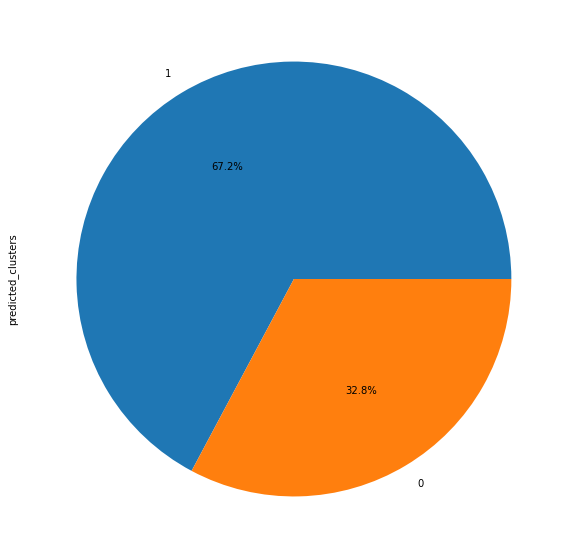

In [32]:
df["predicted_clusters"].value_counts().plot(kind="pie", startangle=0, labeldistance=1.1, autopct='%1.1f%%',figsize=(10,10));

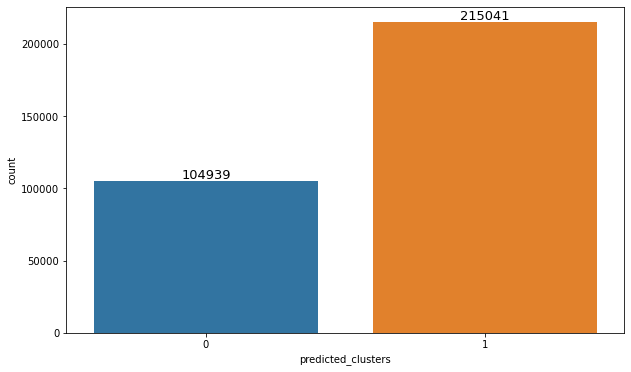

In [33]:
df.predicted_clusters.value_counts()

sns.countplot(x=df["predicted_clusters"], data=df)
for index,value in enumerate(df.predicted_clusters.value_counts().sort_index()):
     plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize = 13)

## Hierarchical Clustering

In [90]:
df2 = df.copy()

In [95]:
df2.head(1)

,base_customer_id,age,brand_code_k,brand_code_t,brand_code_x,brand_code_y,brand_code_z,vehicle_total,ownership_status_aktif,ownership_status_pasif,total_amount_tl,servis,bakim,previous_ownership_duration,ongoing_ownership_duration,gender_kadın,marital_status_evli,city_akdeniz,city_ankara,city_antalya,city_dogu_anadolu,city_ege,city_güney_dogu_anadolu,city_ic_anadolu,city_i̇stanbul,city_i̇zmir,city_karadeniz,city_marmara,city_ydisi,city_yurtdisi_,occupation_burokrat,occupation_ciftci,occupation_diger,occupation_emekli,occupation_esnaf,occupation_ev_hanimi,occupation_isadami,occupation_isci,occupation_isletmeci,occupation_memur,occupation_saglikci,occupation_serbestmeslek,predicted_clusters
0,168254.000,43.000,0.000,0.000,1.000,3.000,2.000,6.000,2.000,4.000,25699.000,12.000,6.000,25.000,18.500,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1


In [96]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166943 entries, 0 to 166942
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   base_customer_id             166943 non-null  float64
 1   age                          166943 non-null  float64
 2   brand_code_k                 166943 non-null  float64
 3   brand_code_t                 166943 non-null  float64
 4   brand_code_x                 166943 non-null  float64
 5   brand_code_y                 166943 non-null  float64
 6   brand_code_z                 166943 non-null  float64
 7   vehicle_total                166943 non-null  float64
 8   ownership_status_aktif       166943 non-null  float64
 9   ownership_status_pasif       166943 non-null  float64
 10  total_amount_tl              166943 non-null  float64
 11  servis                       166943 non-null  float64
 12  bakim                        166943 non-null  float64
 13 

In [103]:
df_32 = df.apply(lambda x: x.astype("float32") if x.dtype=="float64"  else x)
df_32.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166943 entries, 0 to 166942
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   base_customer_id             166943 non-null  float32
 1   age                          166943 non-null  float32
 2   brand_code_k                 166943 non-null  float32
 3   brand_code_t                 166943 non-null  float32
 4   brand_code_x                 166943 non-null  float32
 5   brand_code_y                 166943 non-null  float32
 6   brand_code_z                 166943 non-null  float32
 7   vehicle_total                166943 non-null  float32
 8   ownership_status_aktif       166943 non-null  float32
 9   ownership_status_pasif       166943 non-null  float32
 10  total_amount_tl              166943 non-null  float32
 11  servis                       166943 non-null  float32
 12  bakim                        166943 non-null  float32
 13 

In [107]:
df_32_scaled = pd.DataFrame(MinMaxScaler().fit_transform(df_32))
len(X)

166943

### Hopkins Test

### Dendogram

In [91]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [108]:
hc_ward = linkage(y = df_32_scaled, method = "ward")
hc_complete = linkage(df_32_scaled, "complete")
hc_average = linkage(df_32_scaled, "average")
hc_single = linkage(df_32_scaled, "single")

MemoryError: Unable to allocate 104. GiB for an array with shape (13934899153,) and data type float64

In [ ]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward, leaf_font_size = 10);

In [ ]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward,
           truncate_mode = "lastp",
           p = 10,
           show_contracted = True,
           leaf_font_size = 10);

In [ ]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

# 4. Hierarchical Clustering

## 4.1. Clustering based on  Age and Spending Score

#### *i. Determine optimal number of clusters using Dendogram*

In [103]:
df1_ = df1.drop("predicted_clusters_ageS", axis=1).copy()
df1_.head()

,age,spending_score_(1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


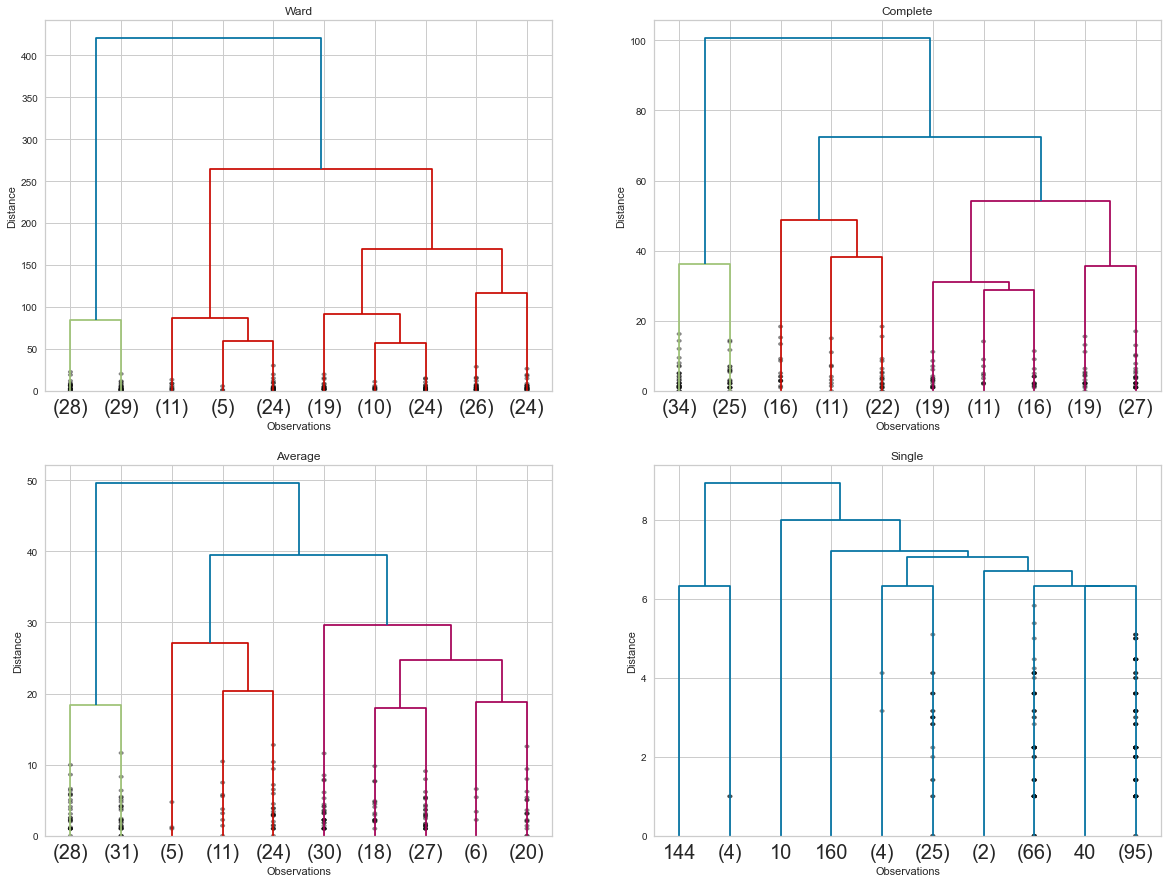

In [104]:
from scipy.cluster.hierarchy import dendrogram, linkage

hc_ward = linkage(y = df1_, method = "ward")
hc_complete = linkage(df1_, "complete")
hc_average = linkage(df1_, "average")
hc_single = linkage(df1_, "single")

plt.figure(figsize = (20, 15))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 20)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 20)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 20)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 20);

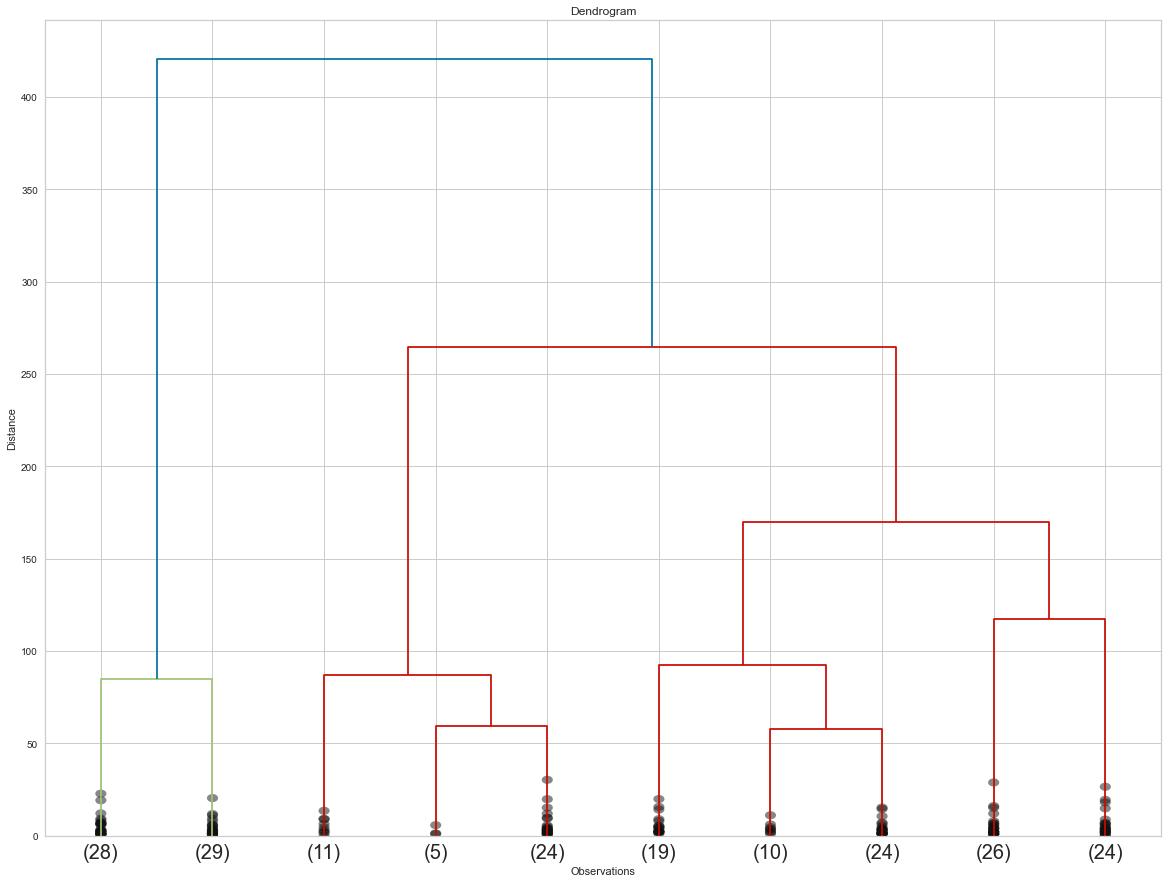

In [105]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize = (20, 15))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(linkage(df1_, method = "ward"), truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 20);

In [106]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
K = range(2,10)

for k in K:
    model_labels = AgglomerativeClustering(n_clusters = k,  
                                           affinity='euclidean', 
                                           linkage='ward').fit_predict(df1_)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df1_, model_labels)}')

Silhouette Score for 2 clusters: 0.4549465643222241
Silhouette Score for 3 clusters: 0.4411791686353356
Silhouette Score for 4 clusters: 0.4602496389565028
Silhouette Score for 5 clusters: 0.40374071753059787
Silhouette Score for 6 clusters: 0.4125958704145705
Silhouette Score for 7 clusters: 0.4158977524079244
Silhouette Score for 8 clusters: 0.3883688959732531
Silhouette Score for 9 clusters: 0.3948151533262091


#### ii. *Apply Agglomerative Clustering*

In [107]:
model_labels_df1_ = AgglomerativeClustering(n_clusters = 4,
                                           affinity='euclidean',
                                           linkage='ward').fit_predict(df1_)
model_labels_df1_

array([0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 0, 0, 3, 0, 3,
       2, 3, 2, 3, 0, 1, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 3, 0, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 0, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3,
       2, 3], dtype=int64)

In [110]:
from sklearn.cluster import AgglomerativeClustering

In [111]:
df1_['predicted_clusters_ageS_hc'] = AgglomerativeClustering(n_clusters = 2,
                                                                affinity='euclidean',
                                                                linkage='ward').fit_predict(df_32_scaled)
df1_.head()

MemoryError: Unable to allocate 104. GiB for an array with shape (13934899153,) and data type float64

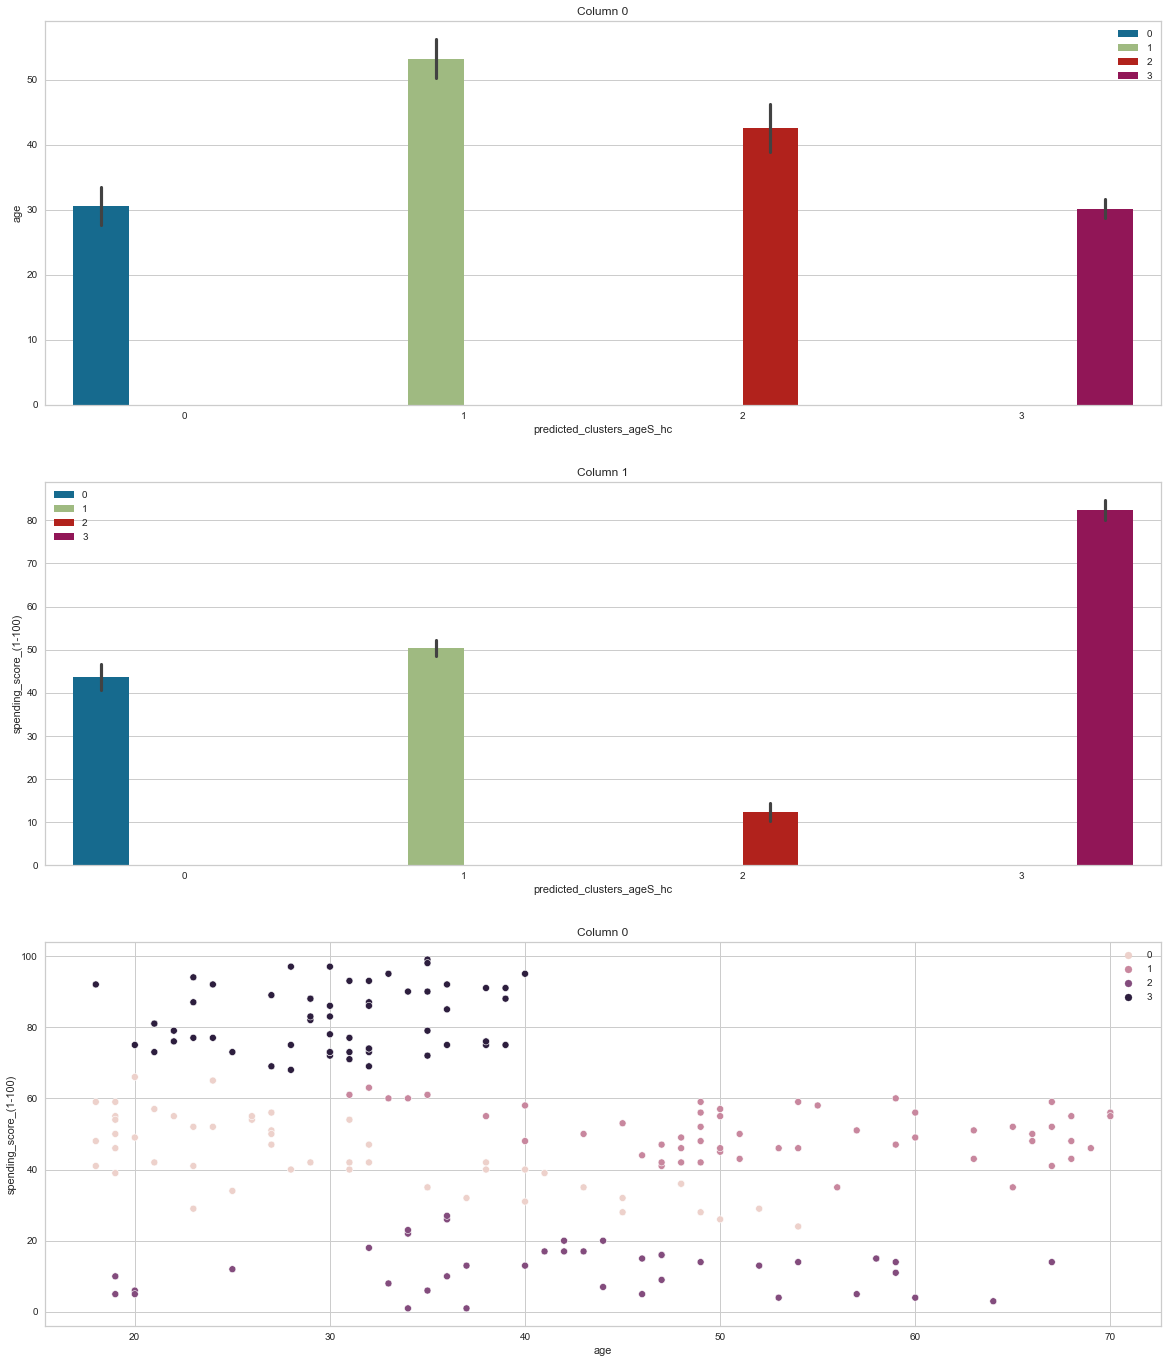

In [109]:
plt.figure(figsize = (20, 24))

plt.subplot(3, 1, 1)
plt.title(f"Column 0")
sns.barplot(data=df1_, x=df1_.iloc[:, 2], y=df1_.iloc[:, 0], hue = model_labels_df1_);   

plt.subplot(3, 1, 2)
plt.title(f"Column 1")
sns.barplot(data=df1_, x=df1_.iloc[:, 2], y=df1_.iloc[:, 1], hue = model_labels_df1_); 

plt.subplot(3, 1, 3)
plt.title(f"Column 0")
sns.scatterplot(data=df1_, x=df1_.iloc[:, 0], y=df1_.iloc[:, 1], hue = model_labels_df1_);  

## 4.2. Clustering based on  Annual Income and Spending Score

#### *i. Determine optimal number of clusters using Dendogram*

In [110]:
df2_ = df2.drop(["predicted_clusters_incomeS4", "predicted_clusters_incomeS5"], axis=1).copy()
df2_.head()

,annual_income_(k$),spending_score_(1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


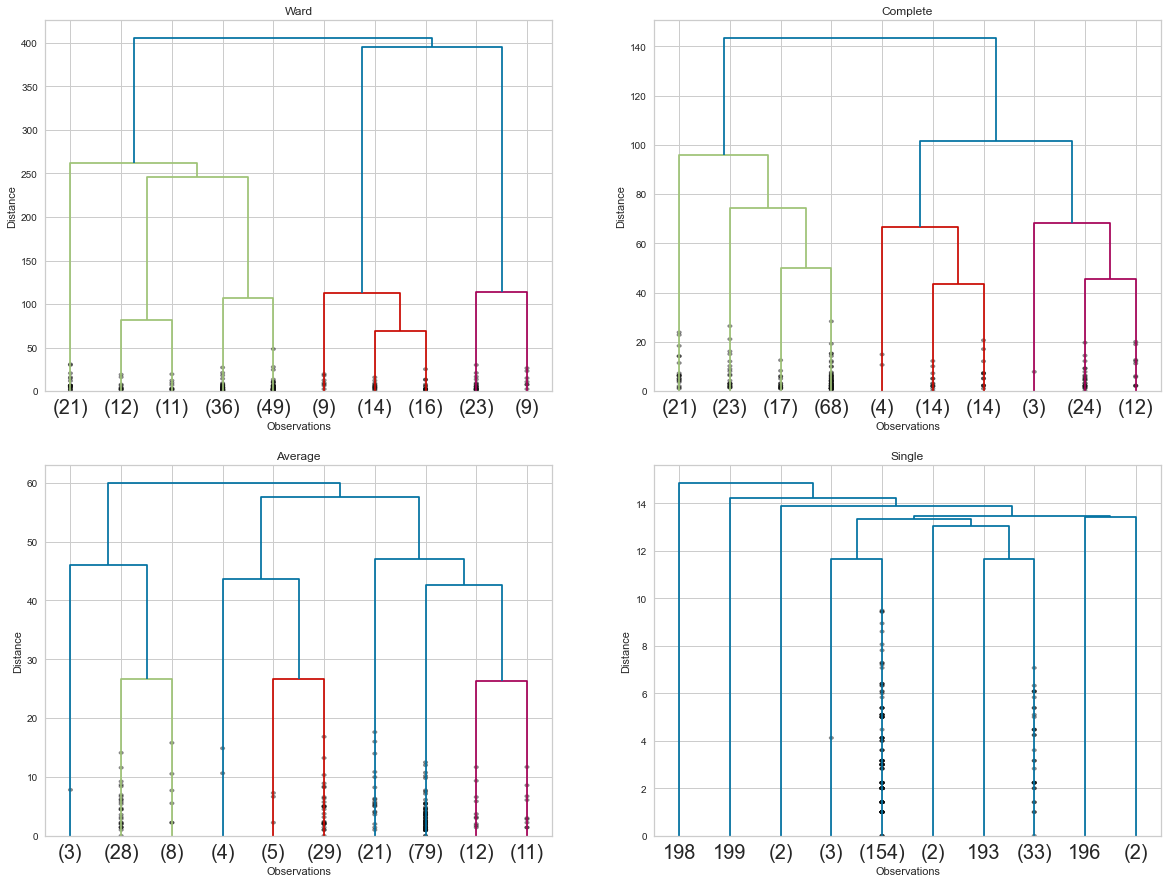

In [111]:
hc_ward = linkage(y = df2_, method = "ward")
hc_complete = linkage(df2_, "complete")
hc_average = linkage(df2_, "average")
hc_single = linkage(df2_, "single")

plt.figure(figsize = (20, 15))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 20)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 20)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 20)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 20);

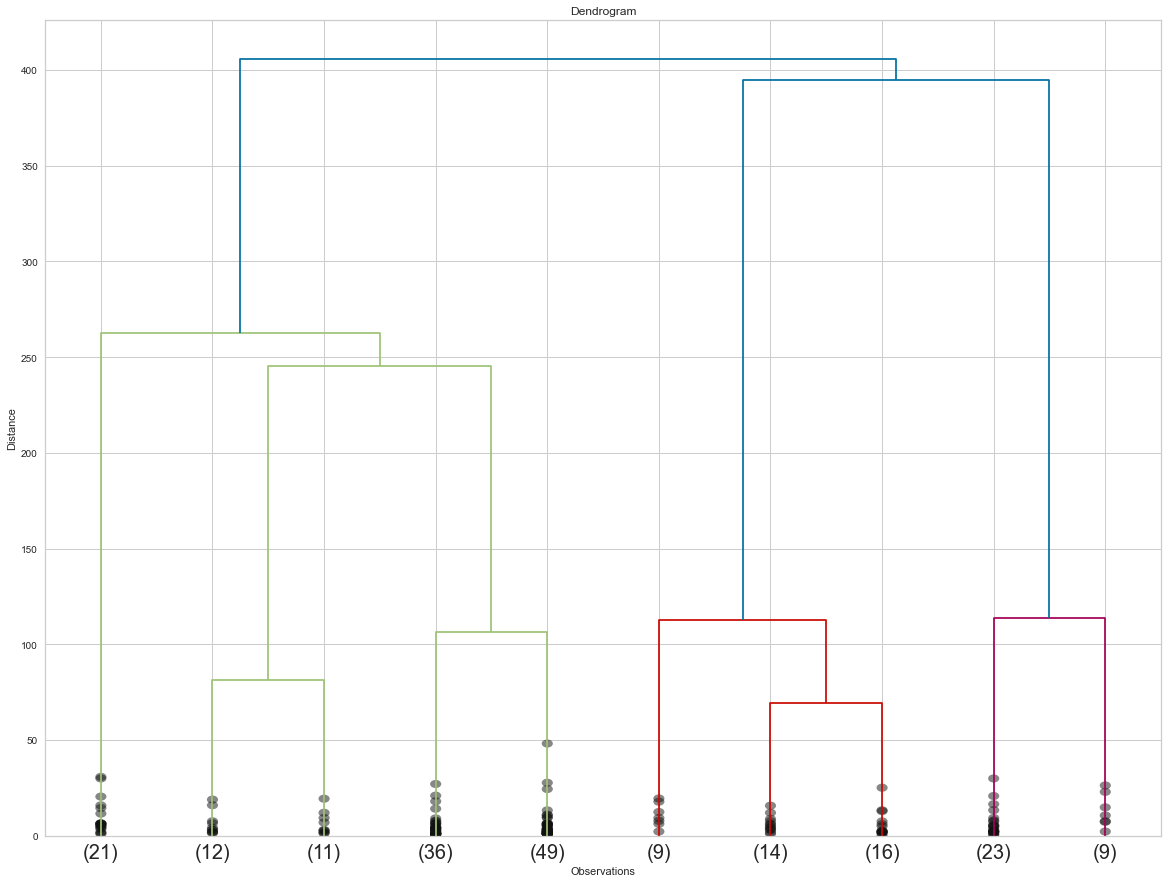

In [112]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize = (20, 15))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(linkage(df2_, method = "ward"), truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 20);

In [113]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
K = range(2,10)

for k in K:
    model_labels = AgglomerativeClustering(n_clusters = k,  
                                           affinity='euclidean', 
                                           linkage='ward').fit_predict(df2_)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df2_, model_labels)}')

Silhouette Score for 2 clusters: 0.36706444723912895
Silhouette Score for 3 clusters: 0.4618340266628975
Silhouette Score for 4 clusters: 0.4916598193892782
Silhouette Score for 5 clusters: 0.5529945955148897
Silhouette Score for 6 clusters: 0.5380208285578872
Silhouette Score for 7 clusters: 0.519904611908887
Silhouette Score for 8 clusters: 0.4326286245782246
Silhouette Score for 9 clusters: 0.43892545672004507


### 4.2.1. With 5 clusters

#### ii. *Apply Agglomerative Clustering*

In [114]:
model_labels_df2_s5 = AgglomerativeClustering(n_clusters = 5,
                                              affinity='euclidean',
                                              linkage='ward').fit_predict(df2_)
model_labels_df2_s5

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [115]:
df2_['predicted_clusters_incomeS5_hc'] = AgglomerativeClustering(n_clusters = 5,
                                                                 affinity='euclidean',
                                                                 linkage='ward').fit_predict(df2_)
df2_.head()

,annual_income_(k$),spending_score_(1-100),predicted_clusters_incomeS5_hc
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


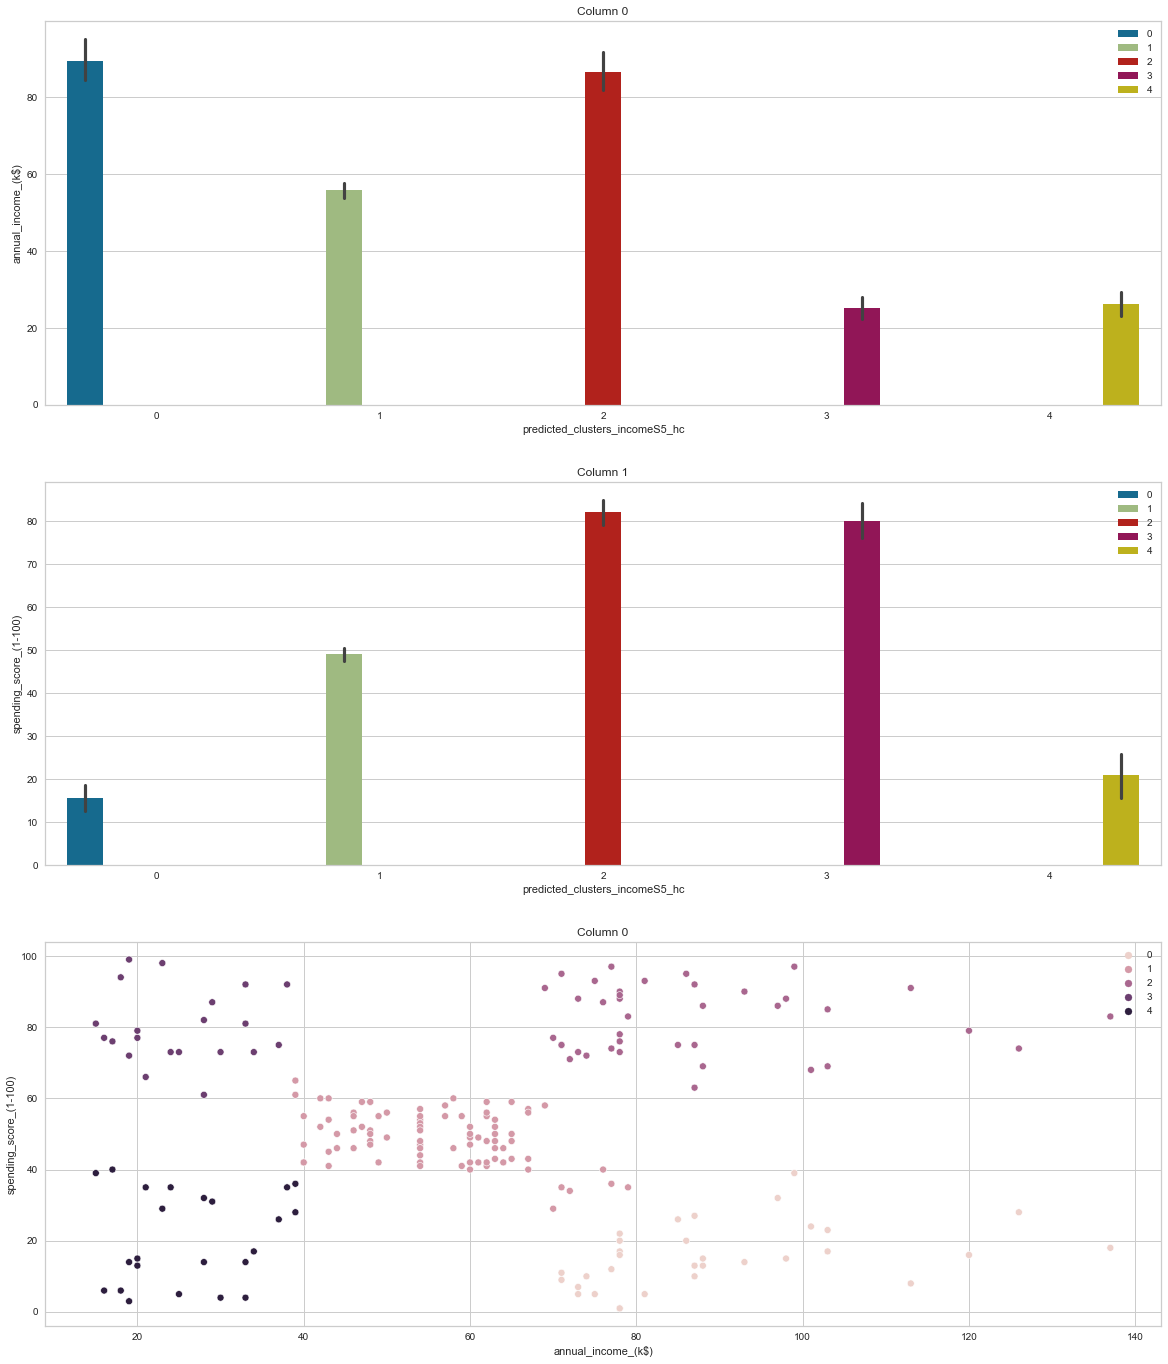

In [116]:
plt.figure(figsize = (20, 24))

plt.subplot(3, 1, 1)
plt.title(f"Column 0")
sns.barplot(data=df2_, x=df2_.iloc[:, 2], y=df2_.iloc[:, 0], hue = model_labels_df2_s5);   

plt.subplot(3, 1, 2)
plt.title(f"Column 1")
sns.barplot(data=df2_, x=df2_.iloc[:, 2], y=df2_.iloc[:, 1], hue = model_labels_df2_s5); 

plt.subplot(3, 1, 3)
plt.title(f"Column 0")
sns.scatterplot(data=df2_, x=df2_.iloc[:, 0], y=df2_.iloc[:, 1], hue = model_labels_df2_s5);  

### 4.2.2. With 4 clusters

In [117]:
# with 4 clusters
model_labels_df2_s4 = AgglomerativeClustering(n_clusters = 4,
                                              affinity='euclidean',
                                              linkage='ward').fit_predict(df2_)
model_labels_df2_s4

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

In [118]:
# with 4 clusters
df2_['predicted_clusters_incomeS4_hc'] = AgglomerativeClustering(n_clusters = 4,
                                                                 affinity='euclidean',
                                                                 linkage='ward').fit_predict(df2_)
df2_.head()

,annual_income_(k$),spending_score_(1-100),predicted_clusters_incomeS5_hc,predicted_clusters_incomeS4_hc
0,15,39,4,0
1,15,81,3,3
2,16,6,4,0
3,16,77,3,3
4,17,40,4,0


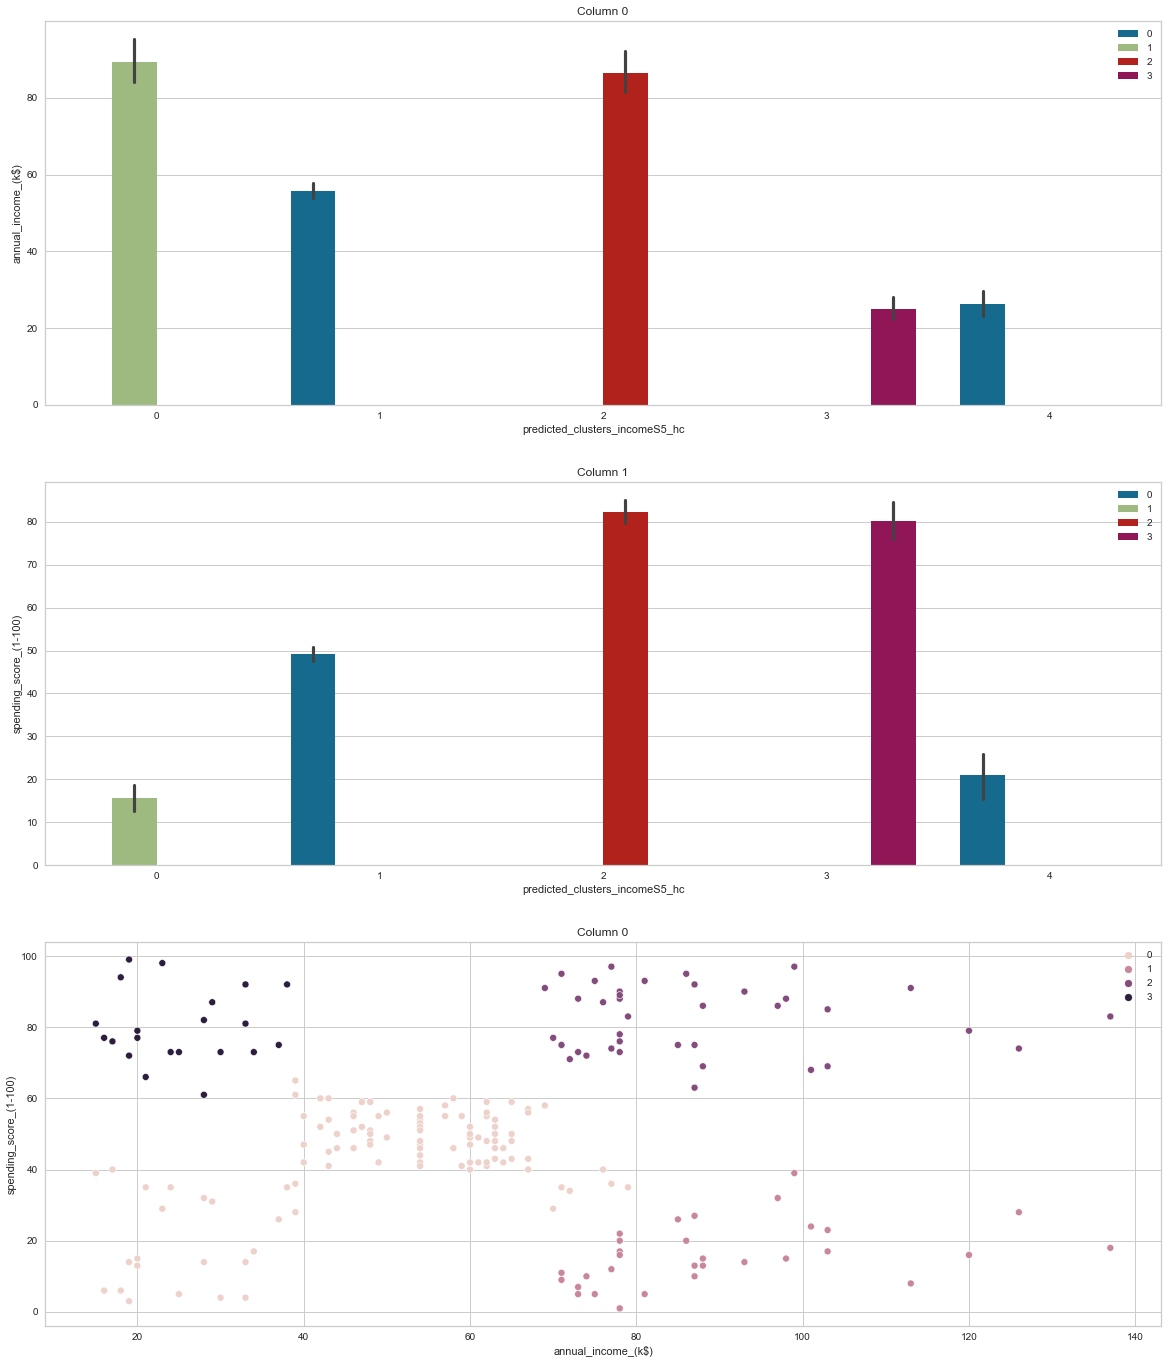

In [119]:
plt.figure(figsize = (20, 24))

plt.subplot(3, 1, 1)
plt.title(f"Column 0")
sns.barplot(data=df2_, x=df2_.iloc[:, 2], y=df2_.iloc[:, 0], hue = model_labels_df2_s4);   

plt.subplot(3, 1, 2)
plt.title(f"Column 1")
sns.barplot(data=df2_, x=df2_.iloc[:, 2], y=df2_.iloc[:, 1], hue = model_labels_df2_s4); 

plt.subplot(3, 1, 3)
plt.title(f"Column 0")
sns.scatterplot(data=df2_, x=df2_.iloc[:, 0], y=df2_.iloc[:, 1], hue = model_labels_df2_s4);  

## 4.3. Clustering based on Annual Income and Age


In [120]:
df3_ = df3.drop(["predicted_clusters_incomeAge"], axis=1).copy()
df3_.head()

,age,annual_income_(k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17


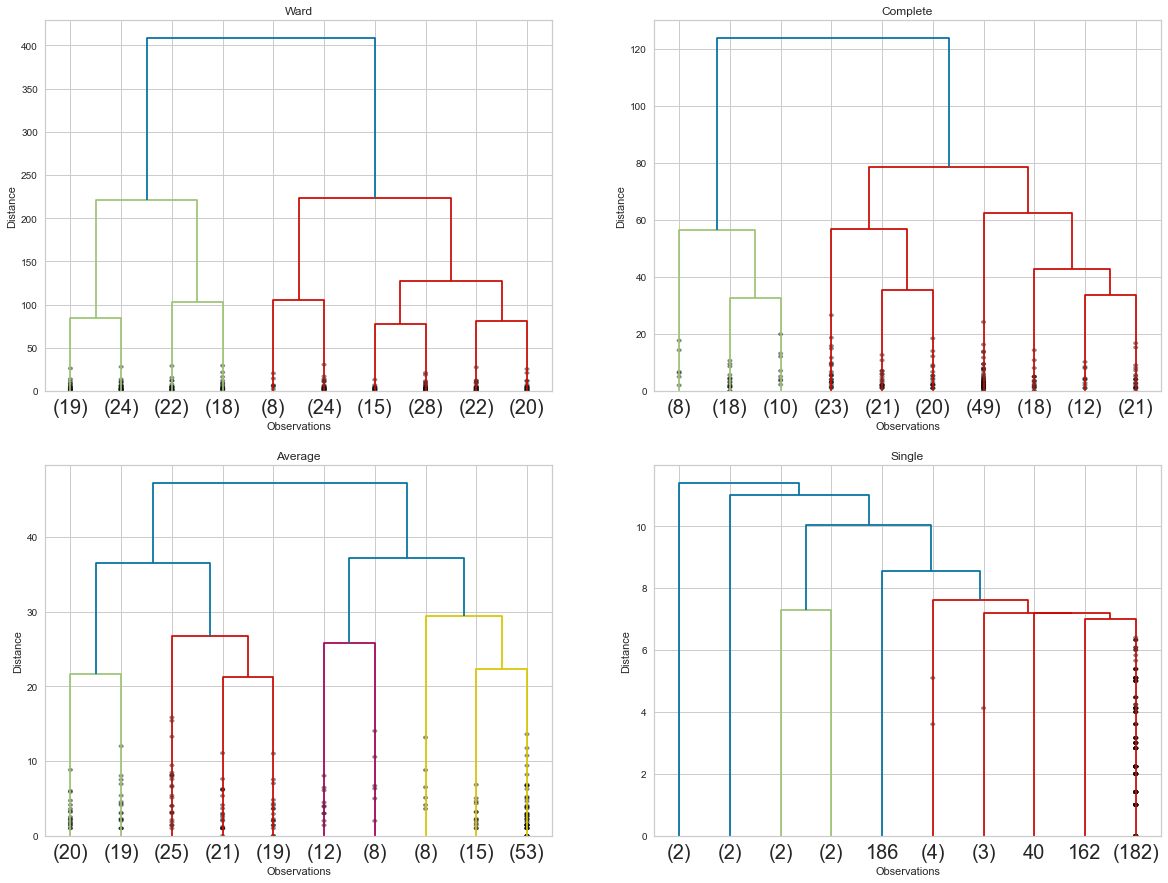

In [121]:
hc_ward = linkage(y = df3_, method = "ward")
hc_complete = linkage(df3_, "complete")
hc_average = linkage(df3_, "average")
hc_single = linkage(df3_, "single")

plt.figure(figsize = (20, 15))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 20)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 20)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 20)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 20);

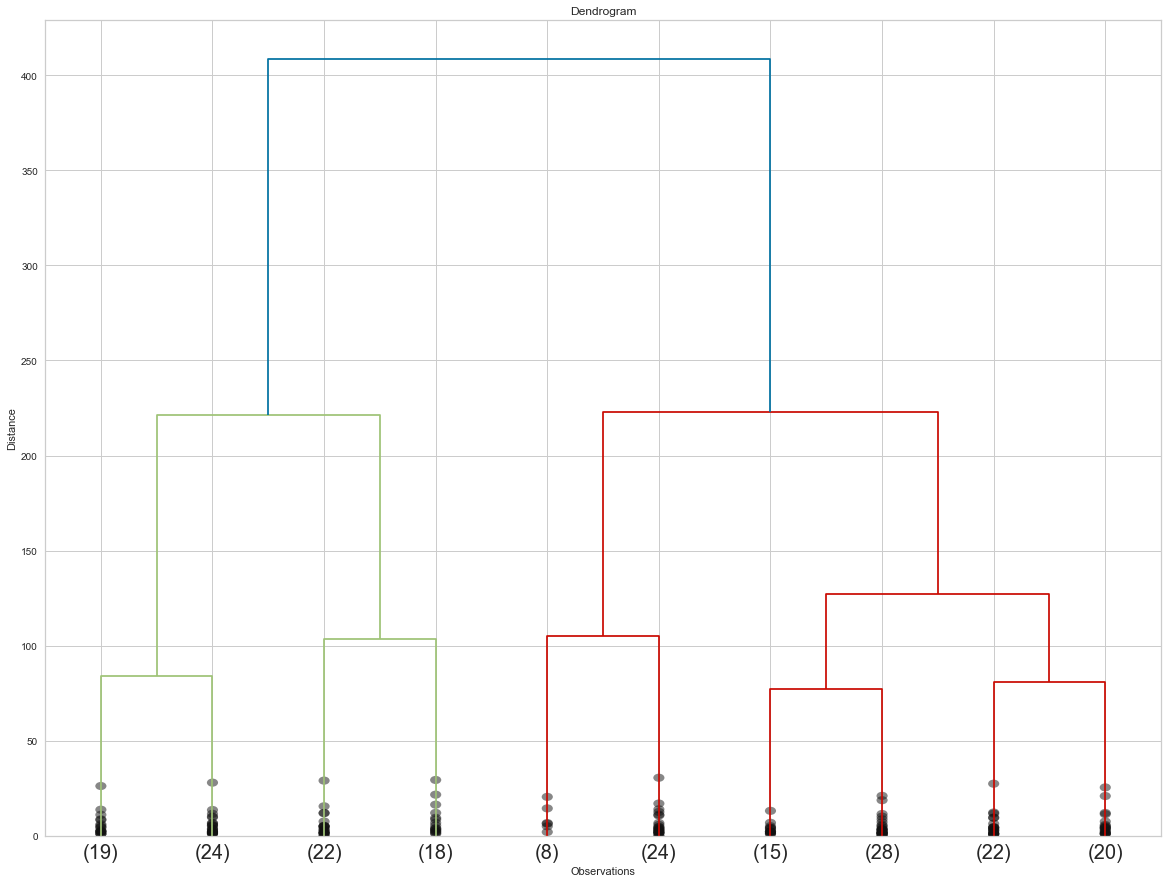

In [122]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize = (20, 15))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(linkage(df3_, method = "ward"), truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 20);

In [123]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
K = range(2,10)

for k in K:
    model_labels = AgglomerativeClustering(n_clusters = k,  
                                           affinity='euclidean', 
                                           linkage='ward').fit_predict(df3_)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df3_, model_labels)}')

Silhouette Score for 2 clusters: 0.4104652474372429
Silhouette Score for 3 clusters: 0.33551603786375067
Silhouette Score for 4 clusters: 0.3841357046286839
Silhouette Score for 5 clusters: 0.36930163803129956
Silhouette Score for 6 clusters: 0.3763491738318196
Silhouette Score for 7 clusters: 0.3683302335180803
Silhouette Score for 8 clusters: 0.3615716673123782
Silhouette Score for 9 clusters: 0.37804735934215244


#### ii. *Apply Agglomerative Clustering*

In [124]:
model_labels_df3_ = AgglomerativeClustering(n_clusters = 4,
                                           affinity='euclidean',
                                           linkage='ward').fit_predict(df3_)
model_labels_df3_

array([3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3,
       1, 3, 1, 3, 1, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3,
       0, 1, 3, 3, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [125]:
df3_['predicted_clusters_incomeAge_hc'] = AgglomerativeClustering(n_clusters = 4,
                                                                affinity='euclidean',
                                                                linkage='ward').fit_predict(df3_)
df3_.head()

,age,annual_income_(k$),predicted_clusters_incomeAge_hc
0,19,15,3
1,21,15,3
2,20,16,3
3,23,16,3
4,31,17,3


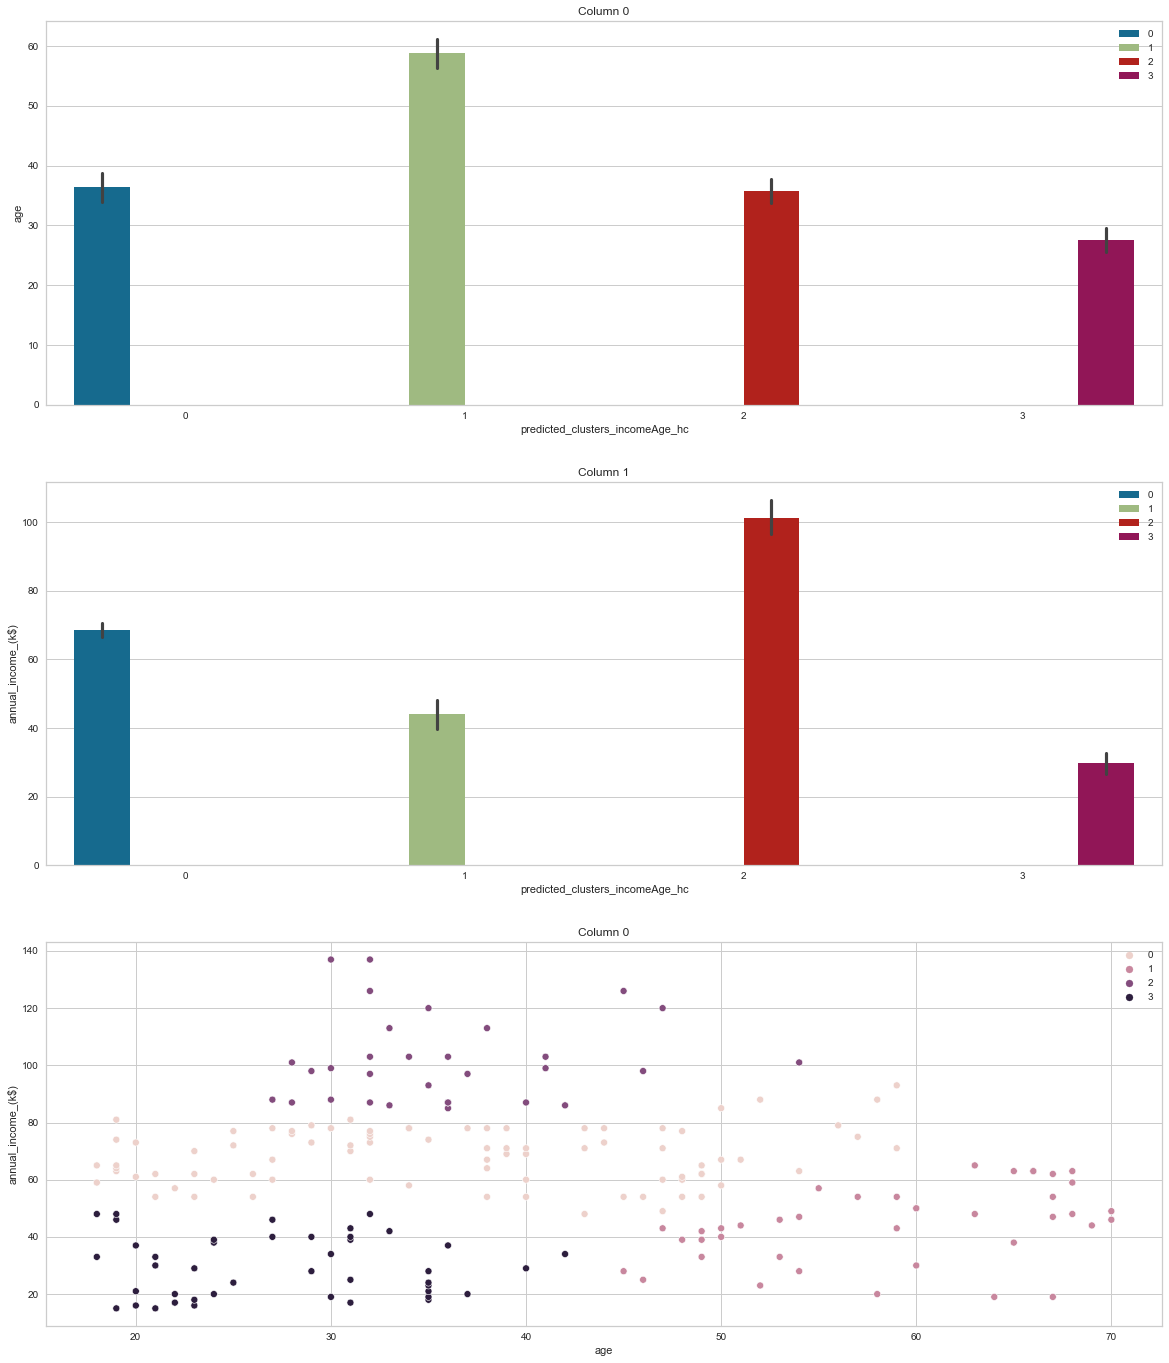

In [126]:
plt.figure(figsize = (20, 24))

plt.subplot(3, 1, 1)
plt.title(f"Column 0")
sns.barplot(data=df3_, x=df3_.iloc[:, 2], y=df3_.iloc[:, 0], hue = model_labels_df3_);   

plt.subplot(3, 1, 2)
plt.title(f"Column 1")
sns.barplot(data=df3_, x=df3_.iloc[:, 2], y=df3_.iloc[:, 1], hue = model_labels_df3_); 

plt.subplot(3, 1, 3)
plt.title(f"Column 0")
sns.scatterplot(data=df3_, x=df3_.iloc[:, 0], y=df3_.iloc[:, 1], hue = model_labels_df3_);  

### 4.4. Compare all three clusters

In [127]:
df1_.head(2)

,age,spending_score_(1-100),predicted_clusters_ageS_hc
0,19,39,0
1,21,81,3


In [128]:
df2_.head(2)

,annual_income_(k$),spending_score_(1-100),predicted_clusters_incomeS5_hc,predicted_clusters_incomeS4_hc
0,15,39,4,0
1,15,81,3,3


In [129]:
df3_.head(2)

,age,annual_income_(k$),predicted_clusters_incomeAge_hc
0,19,15,3
1,21,15,3


In [130]:
df_.head(10).T

,0,1,2,3,4,5,6,7,8,9
gender,Male,Male,Female,Female,Female,Female,Female,Female,Male,Female
age,19,21,20,23,31,22,35,23,64,30
annual_income_(k$),15,15,16,16,17,17,18,18,19,19
spending_score_(1-100),39,81,6,77,40,76,6,94,3,72
predicted_clusters_ageS,0,2,1,2,0,2,1,2,1,2
predicted_clusters_incomeS4,2,0,2,0,2,0,2,0,2,0
predicted_clusters_incomeS5,4,3,4,3,4,3,4,3,4,3
predicted_clusters_incomeAge,1,1,1,1,1,1,1,1,0,1


In [131]:
df_.insert(5, "predicted_clusters_ageS_hc", df1_["predicted_clusters_ageS_hc"])
df_.insert(7, "predicted_clusters_incomeS4_hc", df2_["predicted_clusters_incomeS4_hc"])
df_.insert(9, "predicted_clusters_incomeS5_hc", df2_["predicted_clusters_incomeS5_hc"])
df_.insert(11, "predicted_clusters_incomeAge_hc", df3_["predicted_clusters_incomeAge_hc"])

In [132]:
df_.head(10).T

,0,1,2,3,4,5,6,7,8,9
gender,Male,Male,Female,Female,Female,Female,Female,Female,Male,Female
age,19,21,20,23,31,22,35,23,64,30
annual_income_(k$),15,15,16,16,17,17,18,18,19,19
spending_score_(1-100),39,81,6,77,40,76,6,94,3,72
predicted_clusters_ageS,0,2,1,2,0,2,1,2,1,2
predicted_clusters_ageS_hc,0,3,2,3,0,3,2,3,2,3
predicted_clusters_incomeS4,2,0,2,0,2,0,2,0,2,0
predicted_clusters_incomeS4_hc,0,3,0,3,0,3,0,3,0,3
predicted_clusters_incomeS5,4,3,4,3,4,3,4,3,4,3
predicted_clusters_incomeS5_hc,4,3,4,3,4,3,4,3,4,3


In [133]:
df_["predicted_clusters_ageS_hc"].value_counts()

3    57
1    53
0    50
2    40
Name: predicted_clusters_ageS_hc, dtype: int64

In [134]:
df_["predicted_clusters_incomeS4_hc"].value_counts()

0    108
2     39
1     32
3     21
Name: predicted_clusters_incomeS4_hc, dtype: int64

In [135]:
df_["predicted_clusters_incomeS5_hc"].value_counts()

1    85
2    39
0    32
4    23
3    21
Name: predicted_clusters_incomeS5_hc, dtype: int64

In [136]:
df_["predicted_clusters_incomeAge_hc"].value_counts()

0    85
3    43
1    40
2    32
Name: predicted_clusters_incomeAge_hc, dtype: int64

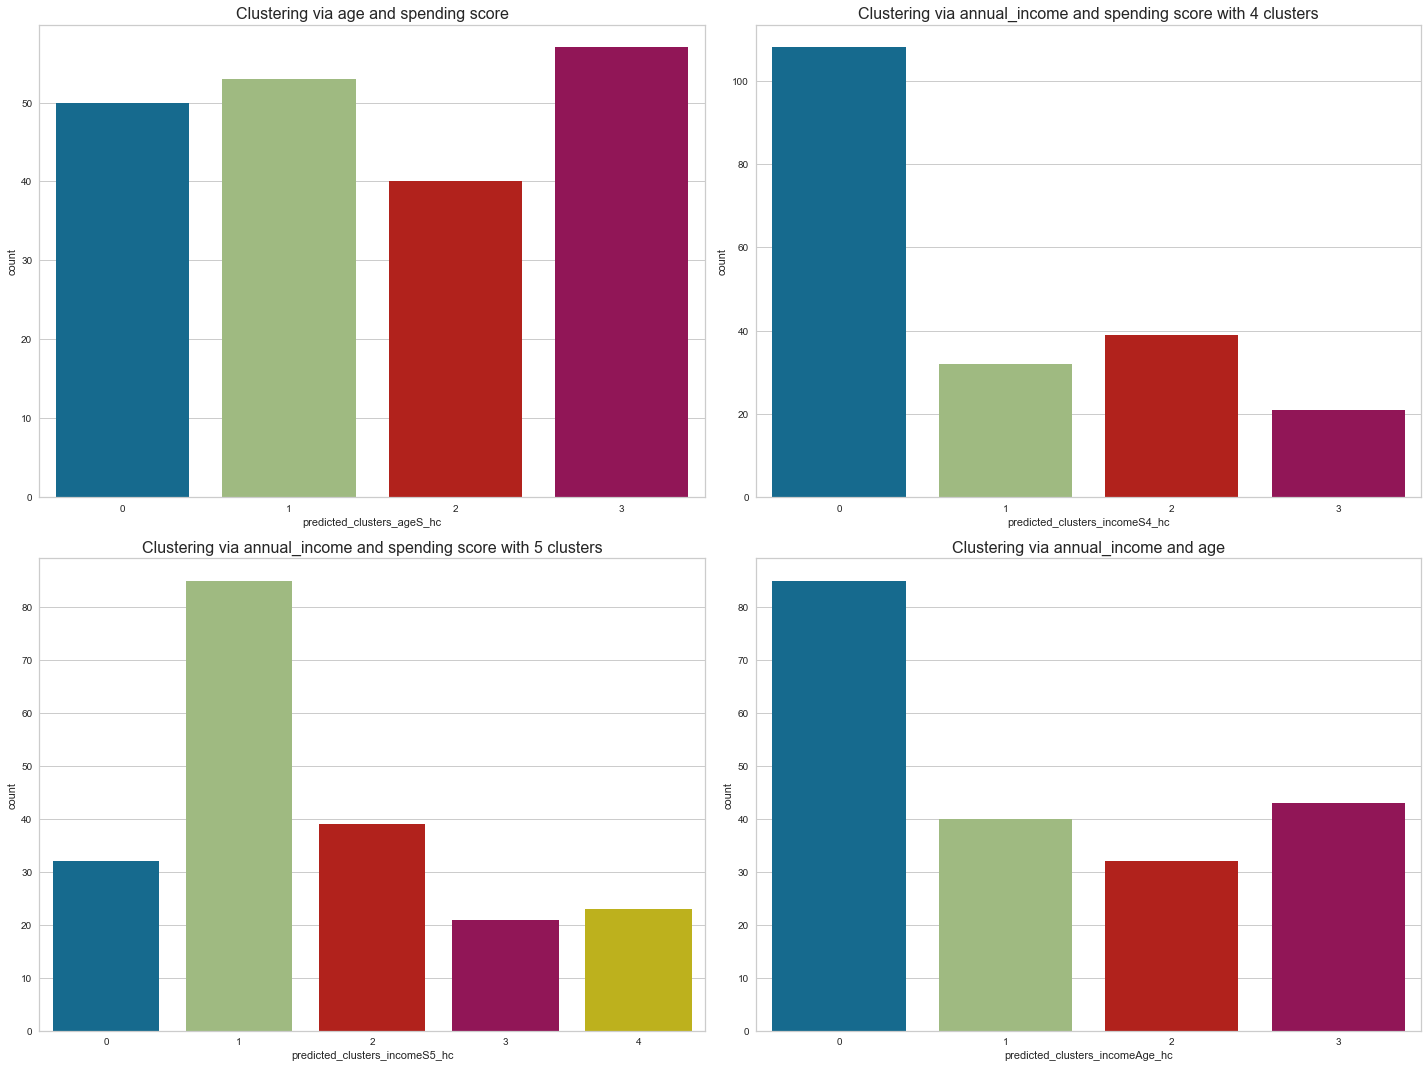

In [137]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 15))

sns.countplot(x=df_["predicted_clusters_ageS_hc"], data=df_, ax=ax[0,0])     
sns.countplot(x=df_["predicted_clusters_incomeS4_hc"], data=df_, ax=ax[0,1])
sns.countplot(x=df_["predicted_clusters_incomeS5_hc"], data=df_, ax=ax[1,0])
sns.countplot(x=df_["predicted_clusters_incomeAge_hc"], data=df_, ax=ax[1,1])
        
ax[0][0].set_title("Clustering via age and spending score", fontsize = 16)
ax[0][1].set_title("Clustering via annual_income and spending score with 4 clusters", fontsize = 16)
ax[1][0].set_title("Clustering via annual_income and spending score with 5 clusters", fontsize = 16)
ax[1][1].set_title("Clustering via annual_income and age", fontsize = 16)
plt.tight_layout();

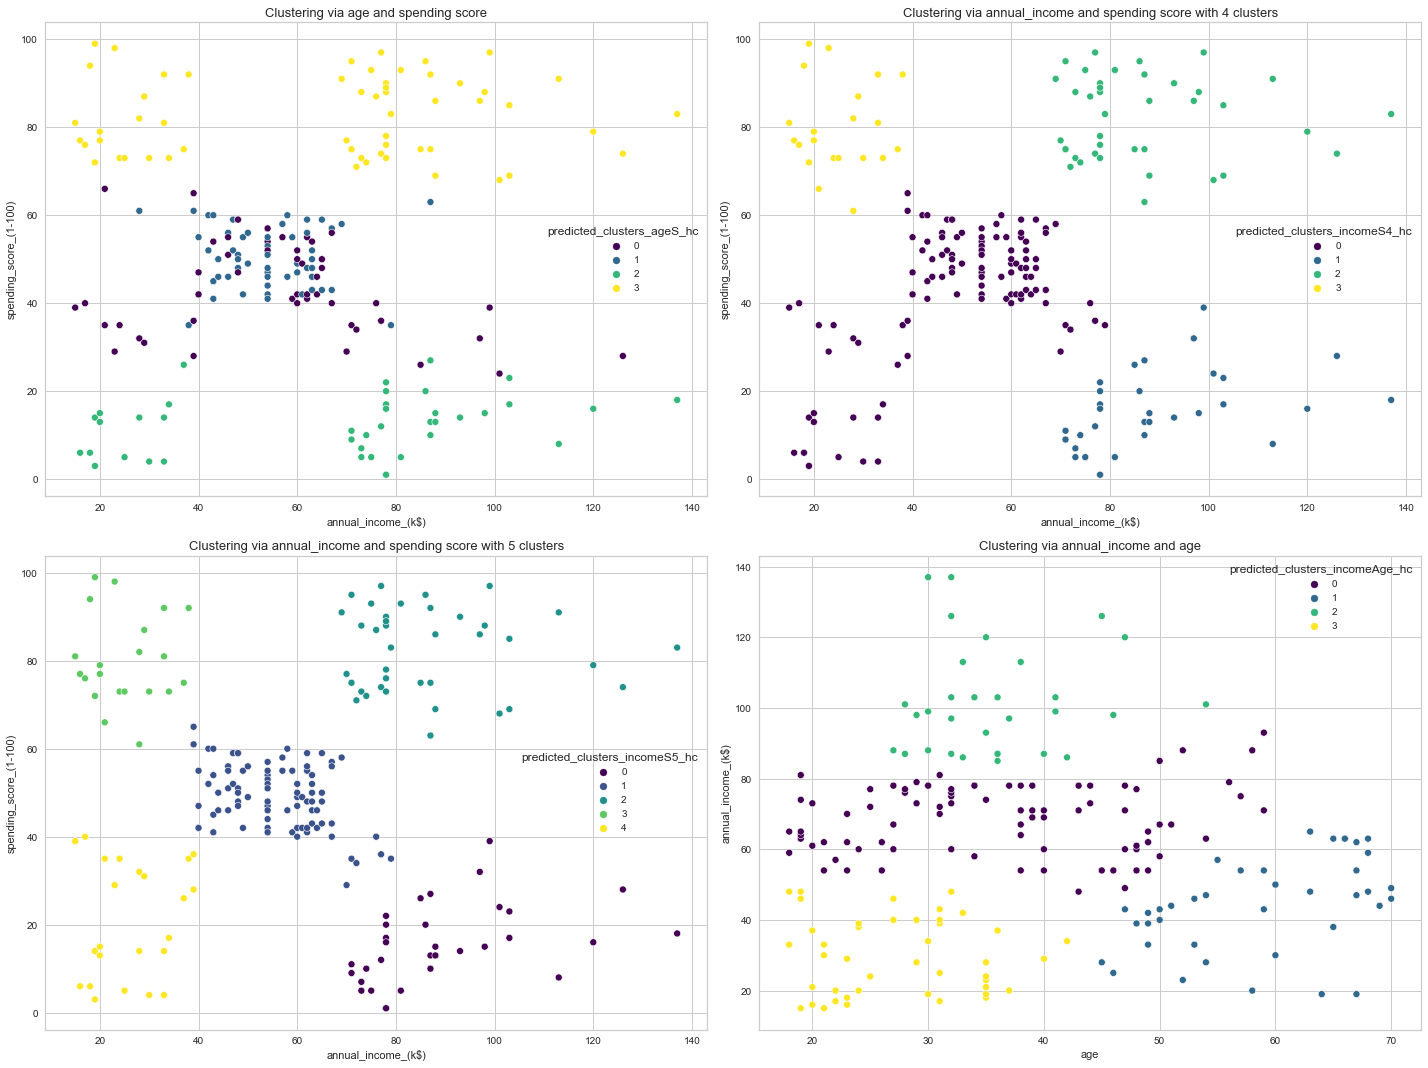

In [138]:
fig, ax =plt.subplots(nrows = 2, ncols = 2, figsize = (20, 15))


sns.scatterplot(df_["annual_income_(k$)"], 
                df_["spending_score_(1-100)"], hue= df_["predicted_clusters_ageS_hc"], palette= "viridis", ax=ax[0,0]);


sns.scatterplot(df_["annual_income_(k$)"], 
                df_["spending_score_(1-100)"], hue= df_["predicted_clusters_incomeS4_hc"], palette= "viridis", ax=ax[0,1]);


sns.scatterplot(df_["annual_income_(k$)"], 
                df_["spending_score_(1-100)"], hue= df_["predicted_clusters_incomeS5_hc"], palette= "viridis", ax=ax[1,0]);

sns.scatterplot(df_["age"],
                df_["annual_income_(k$)"], hue= df_["predicted_clusters_incomeAge_hc"], palette= "viridis", ax=ax[1,1]);

ax[0][0].set_title("Clustering via age and spending score", fontsize = 13)
ax[0][1].set_title("Clustering via annual_income and spending score with 4 clusters", fontsize = 13)
ax[1][0].set_title("Clustering via annual_income and spending score with 5 clusters", fontsize = 13)
ax[1][1].set_title("Clustering via annual_income and age", fontsize = 13);
plt.tight_layout();

In [139]:
# clustering via age and spending_score
fig = px.scatter_3d(x=df_["age"],
                    y=df_["annual_income_(k$)"],
                    z=df_["spending_score_(1-100)"],
                    color=df_["predicted_clusters_ageS_hc"],
                    labels = {"x": "age",
                              "y": "annual_income_(k$)",
                              "z": "spending_score_(1-100)"},
                    hover_name=df_["gender"])
fig.show()

<IPython.core.display.Javascript object>

In [140]:
# clustering via annual_income and spending_score
fig = px.scatter_3d(x=df_["age"],
                    y=df_["annual_income_(k$)"],
                    z=df_["spending_score_(1-100)"],
                    color=df_["predicted_clusters_incomeS4_hc"],
                    labels = {"x": "age",
                              "y": "annual_income_(k$)",
                              "z": "spending_score_(1-100)"},
                   hover_name=df_["gender"])

fig.show()

<IPython.core.display.Javascript object>

In [141]:
# clustering via annual_income and spending_score
fig = px.scatter_3d(x=df_["age"],
                    y=df_["annual_income_(k$)"],
                    z=df_["spending_score_(1-100)"],
                    color=df_["predicted_clusters_incomeS5_hc"],
                    labels = {"x": "age",
                              "y": "annual_income_(k$)",
                              "z": "spending_score_(1-100)"},
                    hover_name=df_["gender"])
fig.show()

<IPython.core.display.Javascript object>

In [142]:
# clustering via annual_income and age
fig = px.scatter_3d(x=df_["age"],
                    y=df_["annual_income_(k$)"],
                    z=df_["spending_score_(1-100)"],
                    color=df_["predicted_clusters_incomeAge_hc"],
                    labels = {"x": "age",
                              "y": "annual_income_(k$)",
                              "z": "spending_score_(1-100)"},
                    hover_name=df_["gender"])
fig.show()

<IPython.core.display.Javascript object>

# 5. Compare two model approach

In [143]:
df_.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
gender,Male,Male,Female,Female,Female,Female,Female,Female,Male,Female,Male,Female,Female,Female,Male
age,19,21,20,23,31,22,35,23,64,30,67,35,58,24,37
annual_income_(k$),15,15,16,16,17,17,18,18,19,19,19,19,20,20,20
spending_score_(1-100),39,81,6,77,40,76,6,94,3,72,14,99,15,77,13
predicted_clusters_ageS,0,2,1,2,0,2,1,2,1,2,1,2,1,2,1
predicted_clusters_ageS_hc,0,3,2,3,0,3,2,3,2,3,2,3,2,3,2
predicted_clusters_incomeS4,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2
predicted_clusters_incomeS4_hc,0,3,0,3,0,3,0,3,0,3,0,3,0,3,0
predicted_clusters_incomeS5,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4
predicted_clusters_incomeS5_hc,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4


Text(0.5, 1.0, 'HC_Agg df3')

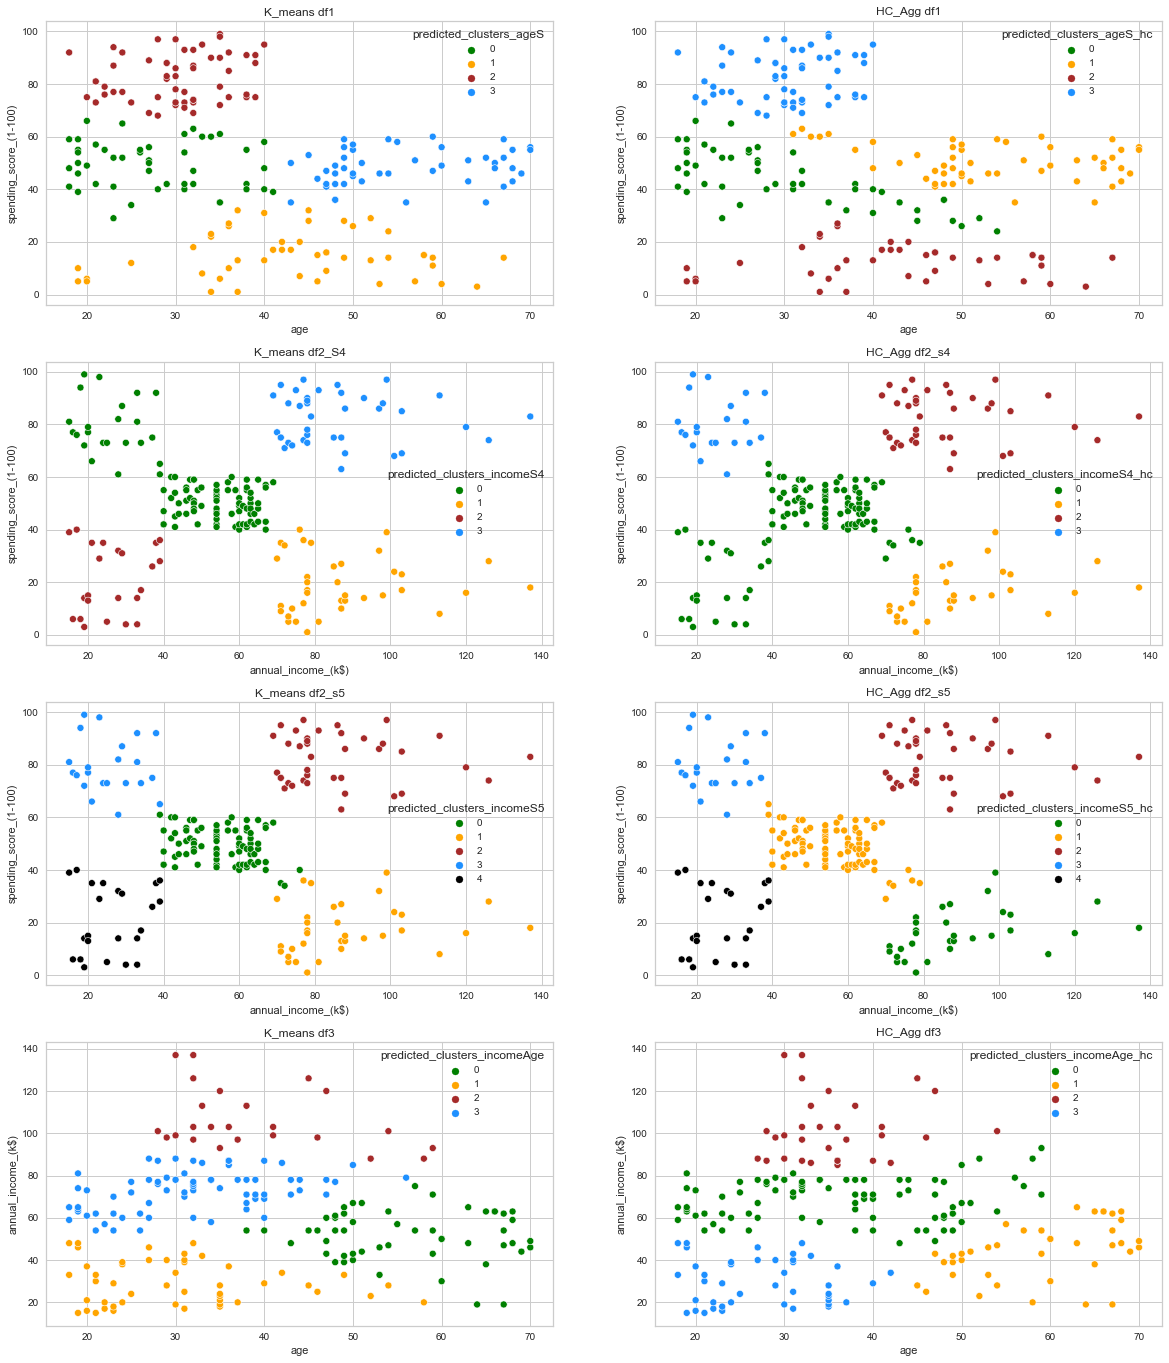

In [144]:
plt.figure(figsize = (20,24))

plt.subplot(421)
sns.scatterplot(x='age', y='spending_score_(1-100)', hue='predicted_clusters_ageS', data=df_, 
                palette=['green','orange','brown','dodgerblue'])
plt.title("K_means df1")
plt.subplot(422)
sns.scatterplot(x='age', y='spending_score_(1-100)', hue='predicted_clusters_ageS_hc', data=df_,
                palette=['green','orange','brown','dodgerblue'])
plt.title("HC_Agg df1")

plt.subplot(423)
sns.scatterplot(x='annual_income_(k$)', y='spending_score_(1-100)', hue='predicted_clusters_incomeS4', data=df_, 
                palette=['green','orange','brown','dodgerblue'])
plt.title("K_means df2_S4")
plt.subplot(424)
sns.scatterplot(x='annual_income_(k$)', y='spending_score_(1-100)', hue='predicted_clusters_incomeS4_hc', data=df_,
                palette=['green','orange','brown','dodgerblue'])
plt.title("HC_Agg df2_s4")

plt.subplot(425)
sns.scatterplot(x='annual_income_(k$)', y='spending_score_(1-100)', hue='predicted_clusters_incomeS5', data=df_, 
                palette=['green','orange','brown','dodgerblue', 'black'])
plt.title("K_means df2_s5")
plt.subplot(426)
sns.scatterplot(x='annual_income_(k$)', y='spending_score_(1-100)', hue='predicted_clusters_incomeS5_hc', data=df_,
                palette=['green','orange','brown','dodgerblue', 'black'])
plt.title("HC_Agg df2_s5")

plt.subplot(427)
sns.scatterplot(x='age', y='annual_income_(k$)', hue='predicted_clusters_incomeAge', data=df_, 
                palette=['green','orange','brown','dodgerblue'])
plt.title("K_means df3")
plt.subplot(428)
sns.scatterplot(x='age', y='annual_income_(k$)', hue='predicted_clusters_incomeAge_hc', data=df_,
                palette=['green','orange','brown','dodgerblue'])
plt.title("HC_Agg df3")

In [145]:
# df1.groupby("predicted_clusters_hc")["country"].unique()

In [146]:
# df2["military_power"] = df2["predicted_clusters_hc"].map({  0 : "less_powerfull",
#                                                             1 : "powerfull",
#                                                             2 : "most_powerfull",
#                                                             3 : "more_powerfull",
#                                                             4 : "weak"})
# df2.head()

# johnson

In [147]:
df_.head().T

,0,1,2,3,4
gender,Male,Male,Female,Female,Female
age,19,21,20,23,31
annual_income_(k$),15,15,16,16,17
spending_score_(1-100),39,81,6,77,40
predicted_clusters_ageS,0,2,1,2,0
predicted_clusters_ageS_hc,0,3,2,3,0
predicted_clusters_incomeS4,2,0,2,0,2
predicted_clusters_incomeS4_hc,0,3,0,3,0
predicted_clusters_incomeS5,4,3,4,3,4
predicted_clusters_incomeS5_hc,4,3,4,3,4


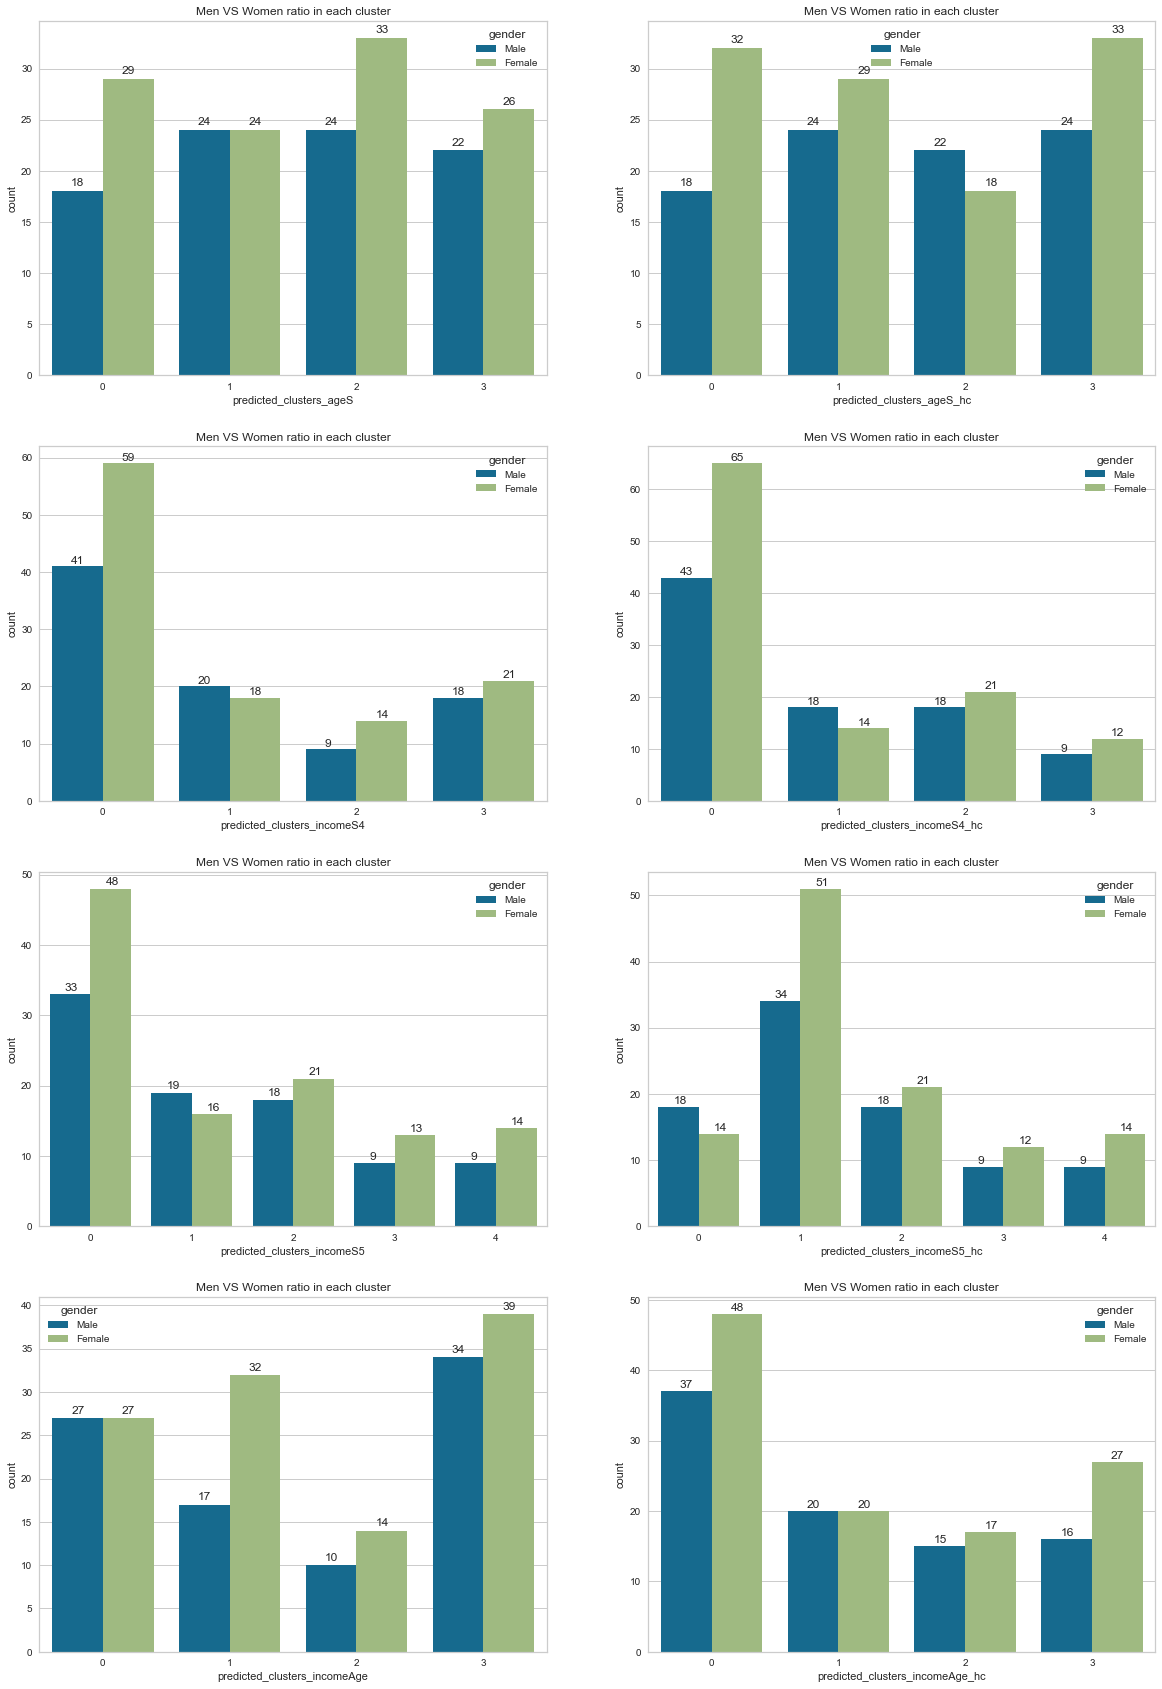

In [148]:
plt.figure(figsize = (20,30))

plt.subplot(421)
x_axis = df_['predicted_clusters_ageS'] 
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=x_axis, hue=df.gender)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() +0.15, p.get_height() + 0.5))


plt.subplot(422)
x_axis = df_['predicted_clusters_ageS_hc']
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=x_axis, hue=df.gender)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() +0.15, p.get_height() + 0.5))

plt.subplot(423)
x_axis = df_['predicted_clusters_incomeS4']
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=x_axis, hue=df.gender)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() +0.15, p.get_height() + 0.5))

plt.subplot(424)
x_axis = df_['predicted_clusters_incomeS4_hc']
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=x_axis, hue=df.gender)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() +0.15, p.get_height() + 0.5))

plt.subplot(425)
x_axis = df_['predicted_clusters_incomeS5']
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=x_axis, hue=df.gender)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() +0.15, p.get_height() + 0.5))

plt.subplot(426)
x_axis = df_['predicted_clusters_incomeS5_hc']
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=x_axis, hue=df.gender)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() +0.15, p.get_height() + 0.5))

plt.subplot(427)
x_axis = df_['predicted_clusters_incomeAge']
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=x_axis, hue=df.gender)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() +0.15, p.get_height() + 0.5))

plt.subplot(428)
x_axis = df_['predicted_clusters_incomeAge_hc']
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=x_axis, hue=df.gender)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() +0.15, p.get_height() + 0.5))


In [149]:
x_axis = 'predicted_clusters_ageS'
df1.groupby(x_axis).describe()

age                                            \
                         count   mean    std    min    25%    50%    75%   
predicted_clusters_ageS                                                    
0                       47.000 27.617  7.167 18.000 21.000 27.000 32.500   
1                       48.000 43.292 11.762 19.000 36.000 44.000 52.000   
2                       57.000 30.175  5.536 18.000 27.000 30.000 35.000   
3                       48.000 55.708  8.558 43.000 48.750 53.500 65.000   

                               spending_score_(1-100)                      \
                           max                  count   mean   std    min   
predicted_clusters_ageS                                                     
0                       41.000                 47.000 49.149 9.137 29.000   
1                       67.000                 48.000 15.021 8.753  1.000   
2                       40.000                 57.000 82.351 8.913 68.000   
3                       70.000                 48.000 48.229 6.923 35.000   

                                                     
                           25%    50%    75%    max  
predicted_clusters_ageS                              
0                       41.500 50.000 55.500 66.000  
1                        7.750 14.000 20.500 32.000  
2                       75.000 81.000 90.000 99.000  
3                       43.000 48.000 53.500 60.000

In [150]:
x_axis = 'predicted_clusters_ageS_hc'
df1_.groupby(x_axis).describe()

age                                            \
                            count   mean    std    min    25%    50%    75%   
predicted_clusters_ageS_hc                                                    
0                          50.000 30.520 10.628 18.000 21.250 27.000 38.000   
1                          53.000 53.170 10.933 31.000 47.000 51.000 63.000   
2                          40.000 42.650 12.569 19.000 34.750 42.500 52.250   
3                          57.000 30.175  5.536 18.000 27.000 30.000 35.000   

                                  spending_score_(1-100)                       \
                              max                  count   mean    std    min   
predicted_clusters_ageS_hc                                                      
0                          54.000                 50.000 43.620 10.519 24.000   
1                          70.000                 53.000 50.453  6.905 35.000   
2                          67.000                 40.000 12.275  6.668  1.000   
3                          40.000                 57.000 82.351  8.913 68.000   

                                                        
                              25%    50%    75%    max  
predicted_clusters_ageS_hc                              
0                          35.250 42.000 52.000 66.000  
1                          46.000 50.000 56.000 63.000  
2                           6.000 13.000 16.250 27.000  
3                          75.000 81.000 90.000 99.000

In [151]:
x_axis = 'predicted_clusters_incomeS4'
df2.groupby(x_axis).describe()

annual_income_(k$)                              \
                                         count   mean    std    min    25%   
predicted_clusters_incomeS4                                                  
0                                      100.000 48.260 14.563 15.000 40.000   
1                                       38.000 87.000 16.271 70.000 76.250   
2                                       23.000 26.304  7.894 15.000 19.500   
3                                       39.000 86.538 16.312 69.000 75.500   

                                                  spending_score_(1-100)  \
                               50%    75%     max                  count   
predicted_clusters_incomeS4                                                
0                           50.000 60.250  69.000                100.000   
1                           80.000 96.000 137.000                 38.000   
2                           25.000 33.000  39.000                 23.000   
3                           79.000 95.000 137.000                 39.000   

                                                                              \
                              mean    std    min    25%    50%    75%    max   
predicted_clusters_incomeS4                                                    
0                           56.480 14.191 40.000 46.750 52.500 60.000 99.000   
1                           18.632 10.916  1.000 10.250 16.500 26.750 40.000   
2                           20.913 13.017  3.000  9.500 17.000 33.500 40.000   
3                           82.128  9.364 63.000 74.500 83.000 90.000 97.000   

                            predicted_clusters_incomeS5                    \
                                                  count  mean   std   min   
predicted_clusters_incomeS4                                                 
0                                               100.000 0.660 1.249 0.000   
1                                                38.000 0.921 0.273 0.000   
2                                                23.000 4.000 0.000 4.000   
3                                                39.000 2.000 0.000 2.000   

                                                     
                              25%   50%   75%   max  
predicted_clusters_incomeS4                          
0                           0.000 0.000 0.000 3.000  
1                           1.000 1.000 1.000 1.000  
2                           4.000 4.000 4.000 4.000  
3                           2.000 2.000 2.000 2.000

In [152]:
x_axis = 'predicted_clusters_incomeS4_hc'
df2_.groupby(x_axis).describe()

annual_income_(k$)                              \
                                            count   mean    std    min    25%   
predicted_clusters_incomeS4_hc                                                  
0                                         108.000 49.528 15.312 15.000 40.000   
1                                          32.000 89.406 16.613 71.000 78.000   
2                                          39.000 86.538 16.312 69.000 75.500   
3                                          21.000 25.095  7.134 15.000 19.000   

                                                     spending_score_(1-100)  \
                                  50%    75%     max                  count   
predicted_clusters_incomeS4_hc                                                
0                              54.000 62.000  79.000                108.000   
1                              86.500 98.250 137.000                 32.000   
2                              79.000 95.000 137.000                 39.000   
3                              24.000 30.000  38.000                 21.000   

                                                                          \
                                 mean    std    min    25%    50%    75%   
predicted_clusters_incomeS4_hc                                             
0                              43.120 14.531  3.000 39.750 46.500 54.000   
1                              15.594  8.937  1.000  9.750 15.000 20.500   
2                              82.128  9.364 63.000 74.500 83.000 90.000   
3                              80.048 10.249 61.000 73.000 77.000 87.000   

                                      predicted_clusters_incomeS5_hc        \
                                  max                          count  mean   
predicted_clusters_incomeS4_hc                                               
0                              65.000                        108.000 1.639   
1                              39.000                         32.000 0.000   
2                              97.000                         39.000 2.000   
3                              99.000                         21.000 3.000   

                                                                    
                                 std   min   25%   50%   75%   max  
predicted_clusters_incomeS4_hc                                      
0                              1.234 1.000 1.000 1.000 1.000 4.000  
1                              0.000 0.000 0.000 0.000 0.000 0.000  
2                              0.000 2.000 2.000 2.000 2.000 2.000  
3                              0.000 3.000 3.000 3.000 3.000 3.000

In [153]:
x_axis = 'predicted_clusters_incomeS5'
df2.groupby(x_axis).describe()

annual_income_(k$)                              \
                                         count   mean    std    min    25%   
predicted_clusters_incomeS5                                                  
0                                       81.000 55.296  8.988 39.000 48.000   
1                                       35.000 88.200 16.399 70.000 77.500   
2                                       39.000 86.538 16.312 69.000 75.500   
3                                       22.000 25.727  7.567 15.000 19.250   
4                                       23.000 26.304  7.894 15.000 19.500   

                                                  spending_score_(1-100)  \
                               50%    75%     max                  count   
predicted_clusters_incomeS5                                                
0                           54.000 62.000  76.000                 81.000   
1                           85.000 97.500 137.000                 35.000   
2                           79.000 95.000 137.000                 39.000   
3                           24.500 32.250  39.000                 22.000   
4                           25.000 33.000  39.000                 23.000   

                                                                              \
                              mean    std    min    25%    50%    75%    max   
predicted_clusters_incomeS5                                                    
0                           49.519  6.531 34.000 44.000 50.000 55.000 61.000   
1                           17.114  9.952  1.000 10.000 16.000 23.500 39.000   
2                           82.128  9.364 63.000 74.500 83.000 90.000 97.000   
3                           79.364 10.504 61.000 73.000 77.000 85.750 99.000   
4                           20.913 13.017  3.000  9.500 17.000 33.500 40.000   

                            predicted_clusters_incomeS4                    \
                                                  count  mean   std   min   
predicted_clusters_incomeS5                                                 
0                                                81.000 0.037 0.190 0.000   
1                                                35.000 1.000 0.000 1.000   
2                                                39.000 3.000 0.000 3.000   
3                                                22.000 0.000 0.000 0.000   
4                                                23.000 2.000 0.000 2.000   

                                                     
                              25%   50%   75%   max  
predicted_clusters_incomeS5                          
0                           0.000 0.000 0.000 1.000  
1                           1.000 1.000 1.000 1.000  
2                           3.000 3.000 3.000 3.000  
3                           0.000 0.000 0.000 0.000  
4                           2.000 2.000 2.000 2.000

In [154]:
x_axis = 'predicted_clusters_incomeS5_hc'
df2_.groupby(x_axis).describe()

annual_income_(k$)                              \
                                            count   mean    std    min    25%   
predicted_clusters_incomeS5_hc                                                  
0                                          32.000 89.406 16.613 71.000 78.000   
1                                          85.000 55.812  9.732 39.000 48.000   
2                                          39.000 86.538 16.312 69.000 75.500   
3                                          21.000 25.095  7.134 15.000 19.000   
4                                          23.000 26.304  7.894 15.000 19.500   

                                                     spending_score_(1-100)  \
                                  50%    75%     max                  count   
predicted_clusters_incomeS5_hc                                                
0                              86.500 98.250 137.000                 32.000   
1                              57.000 63.000  79.000                 85.000   
2                              79.000 95.000 137.000                 39.000   
3                              24.000 30.000  38.000                 21.000   
4                              25.000 33.000  39.000                 23.000   

                                                                          \
                                 mean    std    min    25%    50%    75%   
predicted_clusters_incomeS5_hc                                             
0                              15.594  8.937  1.000  9.750 15.000 20.500   
1                              49.129  7.281 29.000 43.000 49.000 55.000   
2                              82.128  9.364 63.000 74.500 83.000 90.000   
3                              80.048 10.249 61.000 73.000 77.000 87.000   
4                              20.913 13.017  3.000  9.500 17.000 33.500   

                                      predicted_clusters_incomeS4_hc        \
                                  max                          count  mean   
predicted_clusters_incomeS5_hc                                               
0                              39.000                         32.000 1.000   
1                              65.000                         85.000 0.000   
2                              97.000                         39.000 2.000   
3                              99.000                         21.000 3.000   
4                              40.000                         23.000 0.000   

                                                                    
                                 std   min   25%   50%   75%   max  
predicted_clusters_incomeS5_hc                                      
0                              0.000 1.000 1.000 1.000 1.000 1.000  
1                              0.000 0.000 0.000 0.000 0.000 0.000  
2                              0.000 2.000 2.000 2.000 2.000 2.000  
3                              0.000 3.000 3.000 3.000 3.000 3.000  
4                              0.000 0.000 0.000 0.000 0.000 0.000

In [155]:
x_axis = 'predicted_clusters_incomeAge'
df3.groupby(x_axis).describe()

age                                           \
                              count   mean   std    min    25%    50%    75%   
predicted_clusters_incomeAge                                                   
0                            54.000 55.815 8.753 38.000 49.000 54.000 64.750   
1                            49.000 30.347 9.999 18.000 22.000 30.000 35.000   
2                            24.000 39.000 9.320 28.000 32.000 35.500 45.250   
3                            73.000 31.959 8.679 18.000 26.000 32.000 38.000   

                                    annual_income_(k$)                        \
                                max              count    mean    std    min   
predicted_clusters_incomeAge                                                   
0                            70.000             54.000  51.778 11.739 19.000   
1                            58.000             49.000  29.265 10.169 15.000   
2                            59.000             24.000 106.500 14.243 88.000   
3                            56.000             73.000  72.959  9.367 54.000   

                                                             
                                25%     50%     75%     max  
predicted_clusters_incomeAge                                 
0                            44.500  54.000  61.750  75.000  
1                            20.000  28.000  38.000  48.000  
2                            97.750 102.000 114.750 137.000  
3                            65.000  74.000  78.000  88.000

In [156]:
x_axis = 'predicted_clusters_incomeAge_hc'
df3_.groupby(x_axis).describe()

age                                     \
                                 count   mean    std    min    25%    50%   
predicted_clusters_incomeAge_hc                                             
0                               85.000 36.388 11.508 18.000 27.000 37.000   
1                               40.000 58.775  7.872 45.000 51.750 59.500   
2                               32.000 35.719  6.223 27.000 32.000 35.000   
3                               43.000 27.512  6.642 18.000 21.500 27.000   

                                              annual_income_(k$)          \
                                   75%    max              count    mean   
predicted_clusters_incomeAge_hc                                            
0                               47.000 59.000             85.000  68.612   
1                               66.250 70.000             40.000  44.025   
2                               38.500 54.000             32.000 101.312   
3                               32.500 42.000             43.000  29.698   

                                                                             
                                   std    min    25%    50%     75%     max  
predicted_clusters_incomeAge_hc                                              
0                                9.748 48.000 61.000 70.000  77.000  93.000  
1                               13.151 19.000 36.750 45.000  54.000  65.000  
2                               15.247 85.000 87.000 98.500 105.500 137.000  
3                               10.685 15.000 20.000 29.000  39.000  48.000

<AxesSubplot:xlabel='predicted_clusters_incomeAge_hc', ylabel='spending_score_(1-100)'>

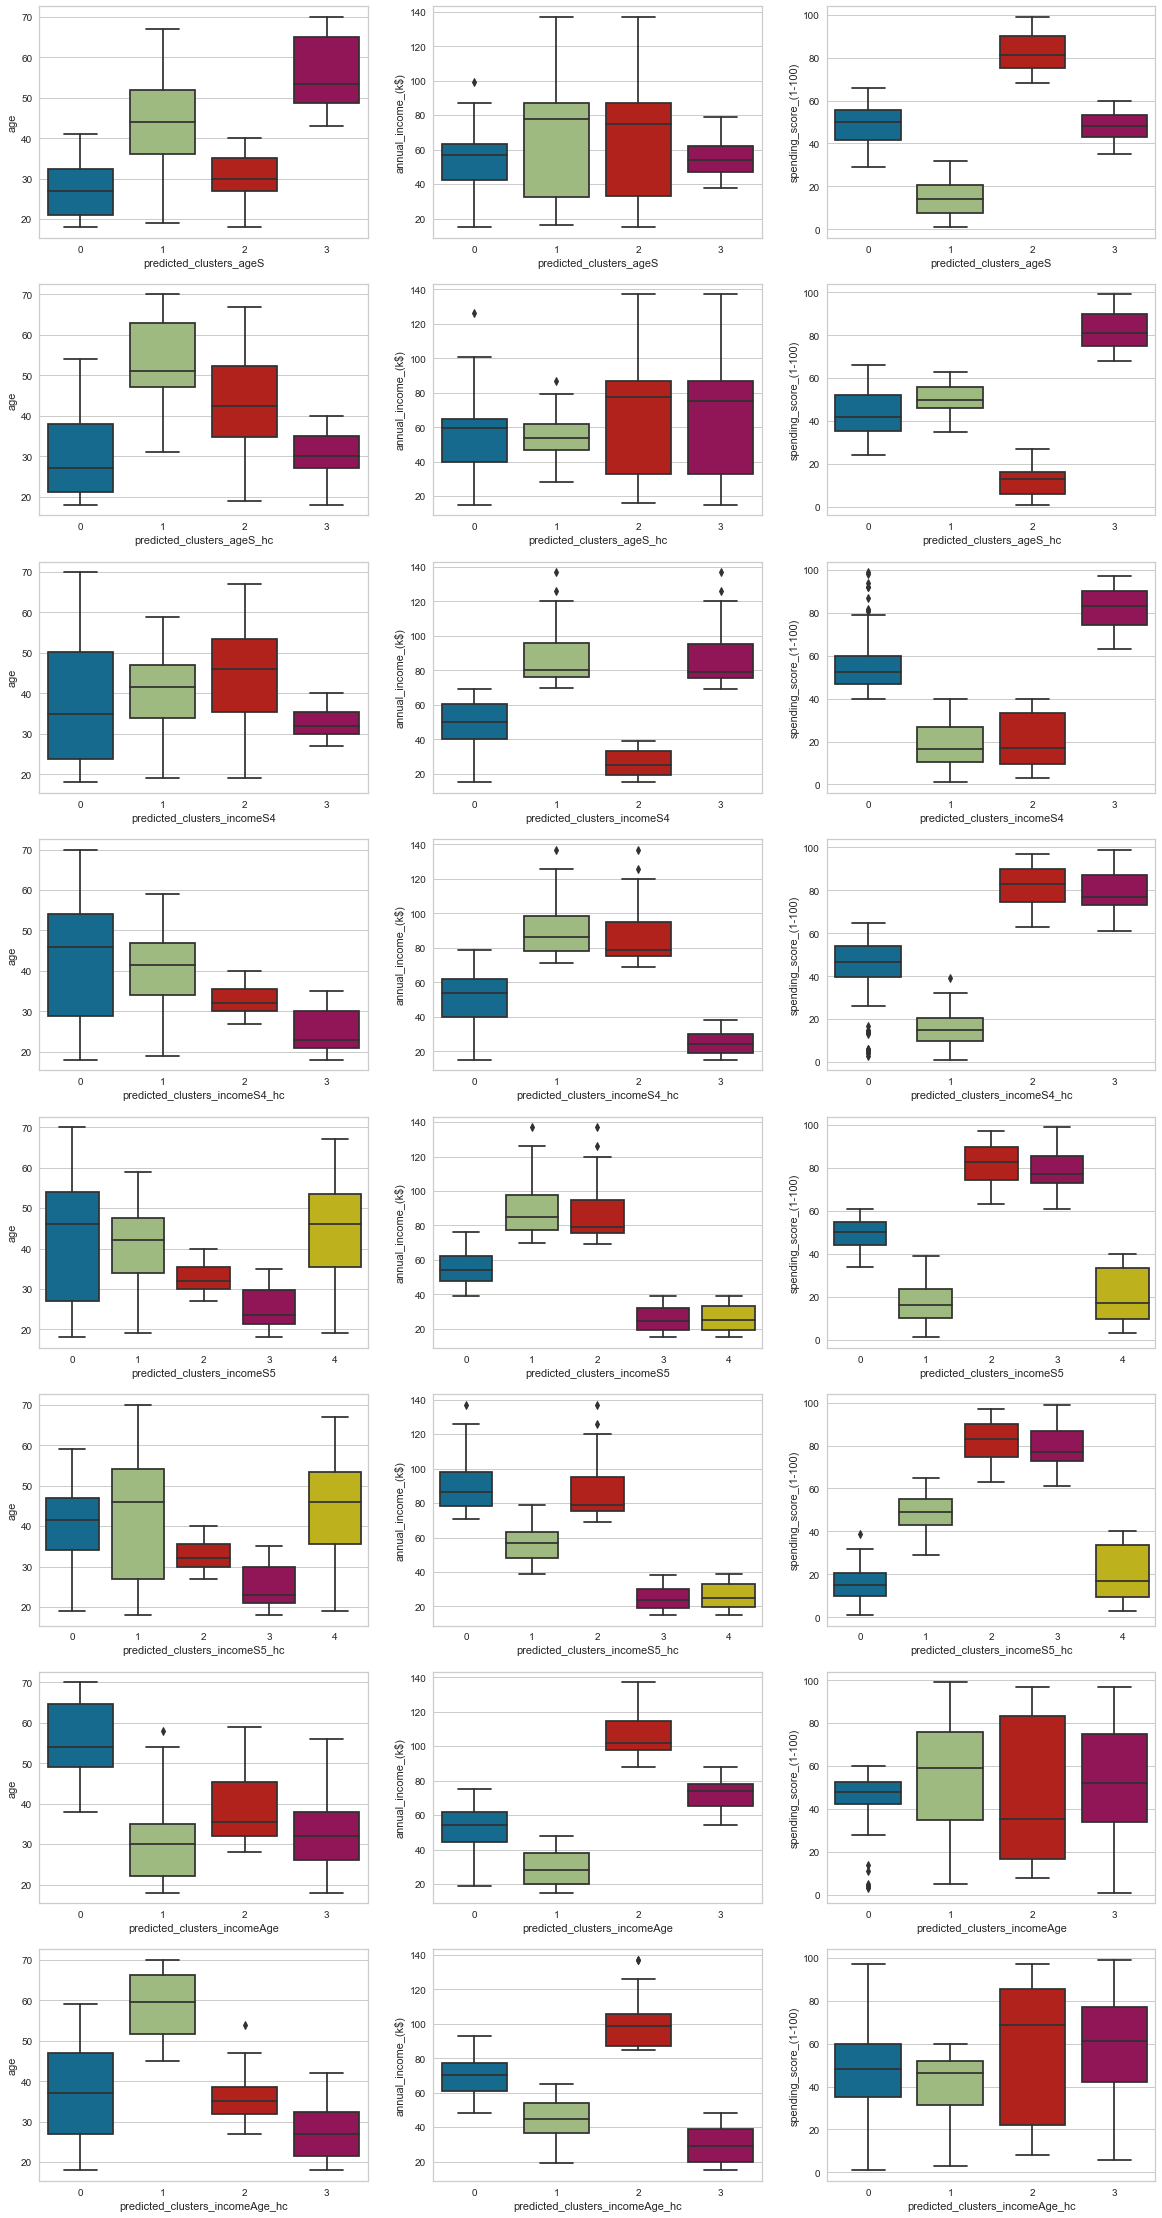

In [157]:
plt.figure(figsize = (20,40))

x_axis = 'predicted_clusters_ageS'
plt.subplot(8,3,1)
sns.boxplot(y = "age", x = x_axis, data = df_)
plt.subplot(8,3,2)
sns.boxplot(y = "annual_income_(k$)", x = x_axis,  data = df_)
plt.subplot(8,3,3)
sns.boxplot(y = "spending_score_(1-100)", x = x_axis, data = df_)

x_axis = 'predicted_clusters_ageS_hc'
plt.subplot(8,3,4)
sns.boxplot(y = "age", x = x_axis, data = df_)
plt.subplot(8,3,5)
sns.boxplot(y = "annual_income_(k$)", x = x_axis,  data = df_)
plt.subplot(8,3,6)
sns.boxplot(y = "spending_score_(1-100)", x = x_axis, data = df_)

x_axis = 'predicted_clusters_incomeS4'
plt.subplot(8,3,7)
sns.boxplot(y = "age", x = x_axis, data = df_)
plt.subplot(8,3,8)
sns.boxplot(y = "annual_income_(k$)", x = x_axis,  data = df_)
plt.subplot(8,3,9)
sns.boxplot(y = "spending_score_(1-100)", x = x_axis, data = df_)

x_axis = 'predicted_clusters_incomeS4_hc'
plt.subplot(8,3,10)
sns.boxplot(y = "age", x = x_axis, data = df_)
plt.subplot(8,3,11)
sns.boxplot(y = "annual_income_(k$)", x = x_axis,  data = df_)
plt.subplot(8,3,12)
sns.boxplot(y = "spending_score_(1-100)", x = x_axis, data = df_)

x_axis = 'predicted_clusters_incomeS5'
plt.subplot(8,3,13)
sns.boxplot(y = "age", x = x_axis, data = df_)
plt.subplot(8,3,14)
sns.boxplot(y = "annual_income_(k$)", x = x_axis,  data = df_)
plt.subplot(8,3,15)
sns.boxplot(y = "spending_score_(1-100)", x = x_axis, data = df_)

x_axis = 'predicted_clusters_incomeS5_hc'
plt.subplot(8,3,16)
sns.boxplot(y = "age", x = x_axis, data = df_)
plt.subplot(8,3,17)
sns.boxplot(y = "annual_income_(k$)", x = x_axis,  data = df_)
plt.subplot(8,3,18)
sns.boxplot(y = "spending_score_(1-100)", x = x_axis, data = df_)

x_axis = 'predicted_clusters_incomeAge'
plt.subplot(8,3,19)
sns.boxplot(y = "age", x = x_axis, data = df_)
plt.subplot(8,3,20)
sns.boxplot(y = "annual_income_(k$)", x = x_axis,  data = df_)
plt.subplot(8,3,21)
sns.boxplot(y = "spending_score_(1-100)", x = x_axis, data = df_)

x_axis = 'predicted_clusters_incomeAge_hc'
plt.subplot(8,3,22)
sns.boxplot(y = "age", x = x_axis, data = df_)
plt.subplot(8,3,23)
sns.boxplot(y = "annual_income_(k$)", x = x_axis,  data = df_)
plt.subplot(8,3,24)
sns.boxplot(y = "spending_score_(1-100)", x = x_axis, data = df_)

In [165]:
# x_axis = df_['predicted_clusters_ageS'] 
# x_axis = df_['predicted_clusters_ageS_hc']
# x_axis = df_['predicted_clusters_incomeS4']
# x_axis = df_['predicted_clusters_incomeS4_hc']
# x_axis = df_['predicted_clusters_incomeS5']
# x_axis = df_['predicted_clusters_incomeS5_hc']
# x_axis = df_['predicted_clusters_incomeAge']
# x_axis = df_['predicted_clusters_incomeAge_hc']

x_axis = 'predicted_clusters_ageS'
# x_axis = 'predicted_clusters_ageS_hc'
# x_axis = 'predicted_clusters_incomeS4'
# x_axis = 'predicted_clusters_incomeS4_hc'
# x_axis = 'predicted_clusters_incomeS5'
# x_axis = 'predicted_clusters_incomeS5_hc'
# x_axis = 'predicted_clusters_incomeAge'
# x_axis = 'predicted_clusters_incomeAge_hc'


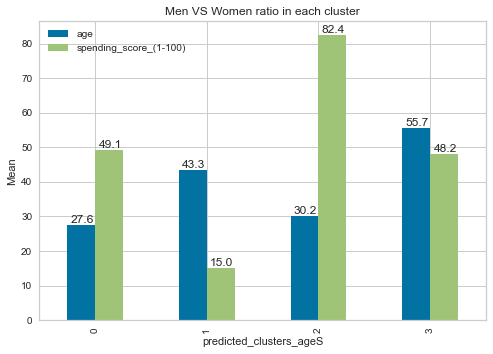

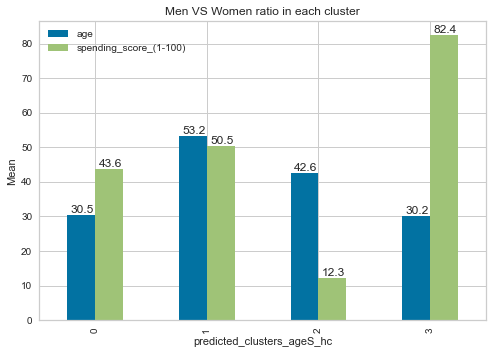

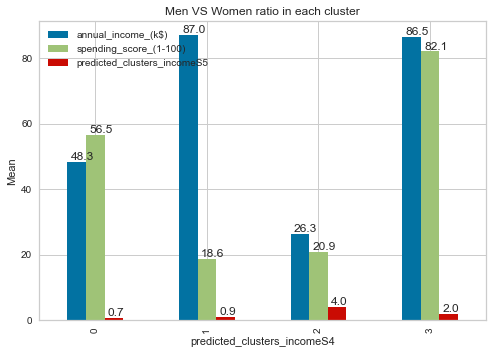

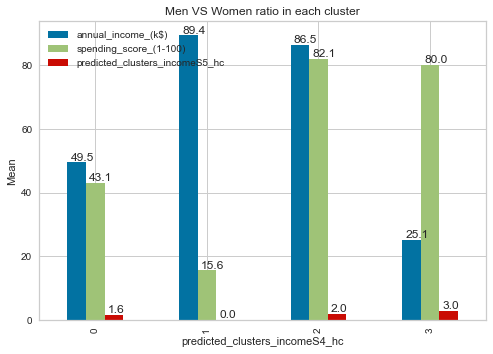

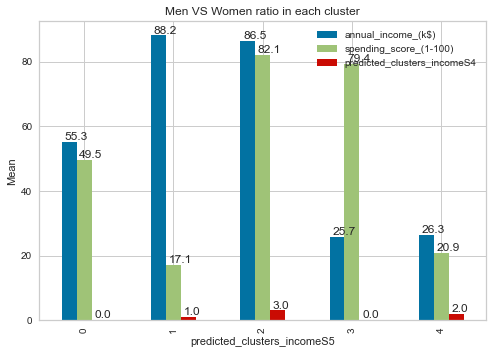

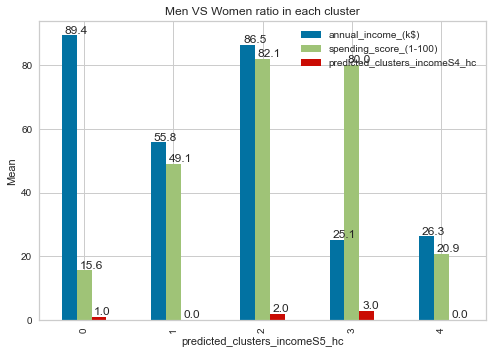

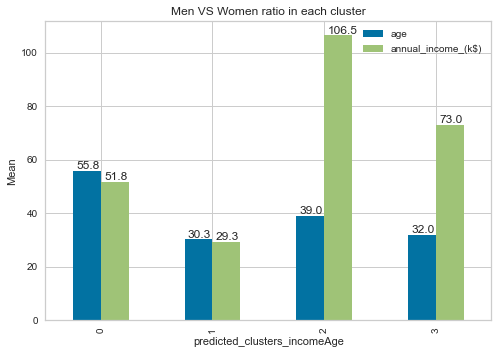

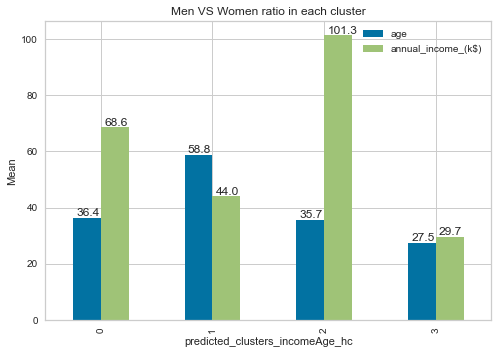

In [246]:
# fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10,12))

# plt.subplot(421)
x_axis = 'predicted_clusters_ageS'
ax=round(df1.groupby(x_axis).mean(),1).plot(kind='bar')
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Mean")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() +0.03, p.get_height() + 0.6))
    
# plt.subplot(422)
x_axis = 'predicted_clusters_ageS_hc'
ax=round(df1_.groupby(x_axis).mean(),1).plot(kind='bar')
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Mean")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() +0.03, p.get_height() + 0.6))
    
# plt.subplot(423)
x_axis = 'predicted_clusters_incomeS4'
ax=round(df2.groupby(x_axis).mean(),1).plot(kind='bar')
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Mean")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() +0.03, p.get_height() + 0.6))
    
# plt.subplot(424)
x_axis = 'predicted_clusters_incomeS4_hc'
ax=round(df2_.groupby(x_axis).mean(),1).plot(kind='bar')
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Mean")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() +0.03, p.get_height() + 0.6))
    
# plt.subplot(425)
x_axis = 'predicted_clusters_incomeS5'
ax=round(df2.groupby(x_axis).mean(),1).plot(kind='bar')
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Mean")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() +0.03, p.get_height() + 0.6))
    
# plt.subplot(426)
x_axis = 'predicted_clusters_incomeS5_hc'
ax=round(df2_.groupby(x_axis).mean(),1).plot(kind='bar')
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Mean")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() +0.03, p.get_height() + 0.6))

# plt.subplot(427)
x_axis = 'predicted_clusters_incomeAge'
ax=round(df3.groupby(x_axis).mean(),1).plot(kind='bar')
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Mean")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() +0.03, p.get_height() + 0.6))
    
# plt.subplot(428)
x_axis = 'predicted_clusters_incomeAge_hc'
ax=round(df3_.groupby(x_axis).mean(),1).plot(kind='bar')
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Mean")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() +0.03, p.get_height() + 0.6))

In [ ]:
plt.figure(figsize = (20,30))

plt.subplot(421)

plt.subplot(422)

plt.subplot(423)

plt.subplot(424)

plt.subplot(425)

plt.subplot(426)

plt.subplot(427)

plt.subplot(428)


### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

In [79]:
x2

,Annual_Income,Spending_Score,cluster_Kmeans,cluster_Agg
0,15,39,2,4
1,15,81,3,3
2,16,6,2,4
3,16,77,3,3
4,17,40,2,4
...,...,...,...,...
195,120,79,4,2
196,126,28,1,0
197,126,74,4,2
198,137,18,1,0


In [80]:
x2.cluster_Kmeans.value_counts()

0    81
4    39
1    35
2    23
3    22
Name: cluster_Kmeans, dtype: int64

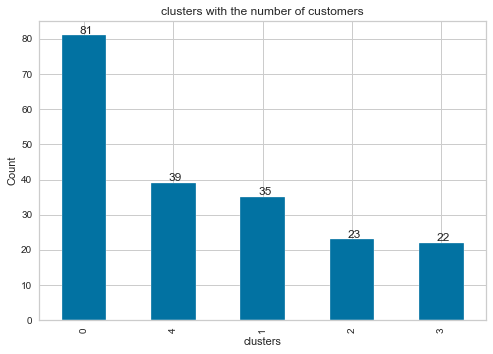

In [81]:
# lets see the number of poeple lie in each group
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = x2.cluster_Kmeans.value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() +0.2, p.get_height() + 0.5))

In [82]:
df.head()

,Gender,Age,Annual_Income,Spending_Score,cluster_Age_Spending_Score
0,Male,19,15,39,3
1,Male,21,15,81,2
2,Female,20,16,6,1
3,Female,23,16,77,2
4,Female,31,17,40,3


In [83]:
df.drop(columns= "cluster_Age_Spending_Score", inplace=True)

In [84]:
df["cluster_Annual_Income_Spending_Score"] = x2.cluster_Kmeans
df.head()

,Gender,Age,Annual_Income,Spending_Score,cluster_Annual_Income_Spending_Score
0,Male,19,15,39,2
1,Male,21,15,81,3
2,Female,20,16,6,2
3,Female,23,16,77,3
4,Female,31,17,40,2


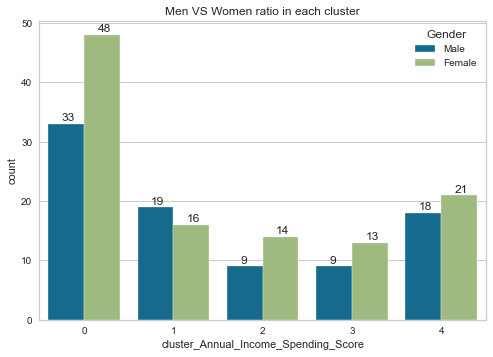

In [85]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df.cluster_Annual_Income_Spending_Score, hue=df.Gender)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() +0.15, p.get_height() + 0.5))

In [86]:
df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean()

Age  Annual_Income  \
Gender cluster_Annual_Income_Spending_Score                             
Female 0                                     40.895833      55.354167   
       1                                     43.250000      90.937500   
       2                                     43.214286      27.357143   
       3                                     25.461538      25.692308   
       4                                     32.190476      86.047619   
Male   0                                     45.363636      55.212121   
       1                                     39.315789      85.894737   
       2                                     48.333333      24.666667   
       3                                     25.000000      25.777778   
       4                                     33.277778      87.111111   

                                             Spending_Score  
Gender cluster_Annual_Income_Spending_Score                  
Female 0                                          49.000000  
       1                                          22.062500  
       2                                          21.714286  
       3                                          80.538462  
       4                                          81.666667  
Male   0                                          50.272727  
       1                                          12.947368  
       2                                          19.666667  
       3                                          77.666667  
       4                                          82.666667

<AxesSubplot:xlabel='cluster_Annual_Income_Spending_Score', ylabel='Spending_Score'>

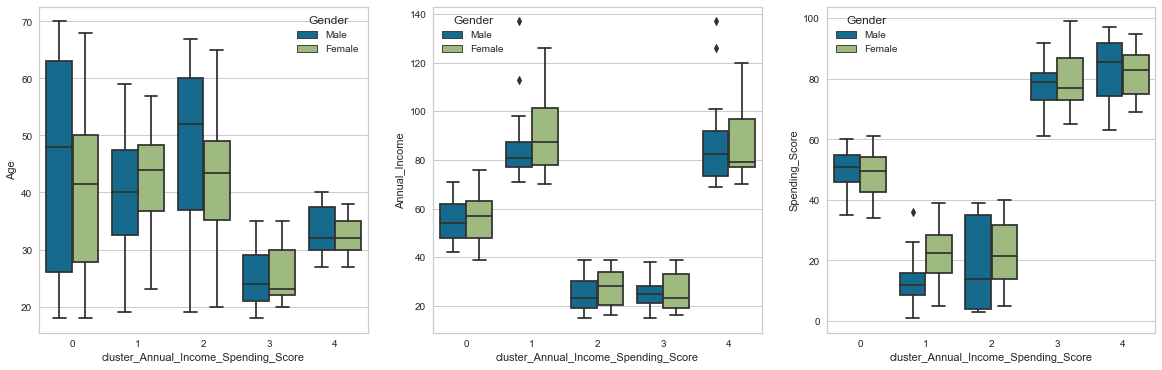

In [87]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y = "Age", x = "cluster_Annual_Income_Spending_Score", hue= "Gender", data = df)

plt.subplot(132)
sns.boxplot(y = "Annual_Income", x = "cluster_Annual_Income_Spending_Score", hue= "Gender", data = df)

plt.subplot(133)
sns.boxplot(y = "Spending_Score", x = "cluster_Annual_Income_Spending_Score", hue= "Gender", data = df)

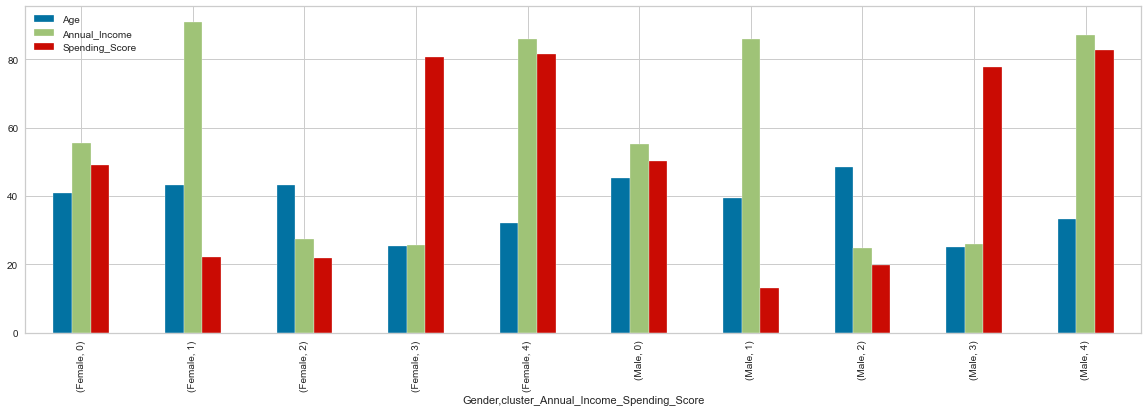

In [88]:
df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean().plot(kind="bar", figsize=(20,6))
plt.show()

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

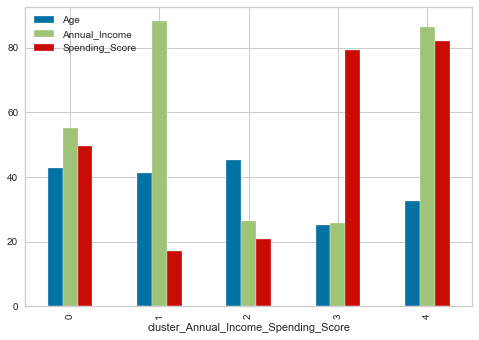

In [89]:
df.groupby("cluster_Annual_Income_Spending_Score").mean().plot(kind='bar')
plt.show()

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this 
group.

# johnson

### Conclusion

In [324]:
# Dummies e sokulmuş kategorical feature ları cluster a sokmayız.
# Kümeleme esnasında datadan çıkarılırlar sonrasında tekrar ilave edilirler.
# Müşteriye en fazla insight sağlayacağını düşündüğümüz featurelearın kendi arasındaki ilişkilerine bakacağız.
# Elmizeki tüm featurelara kümeleme uygulamak yerine bana en fazla hangi feature lar insight sağlar onları bulup onları kümelemeye sokmalıyız.
# 2 insight:
# 1. yaşı artanlar harcamaya yönelmiyorlar, daha az harcıyorlar. (spending score - age arasındaki corr: -.33 yani spending score arttıkça yaş azalıyor)
# 2. Annual_income a bağlı olarak harcama değişmiyor.. (annual_income-spending_score arasındaki corr: 0.0099 neredeyse hiç korele değil)
# box plotta nerelerde yoğunluk olduğunu göremiyorum fakat violinplotta yoğunluğu görebiliyorum. (şişkin kısımlar)
# kümeler neredeyse çok net belli oluyor. ortadaki kümede bayan ağırlığı dikkat çekiyor.
# nümerik verilerde K-means daha iyi çalışıyor.
# datamdaki nümerik verilere baktığımda scalaları birbirine yakın. bu yüzden scaling yapmama gerek yok. Bu durumda deniyorum, scale edilmemiş score um daha yüksek olduğu için scale etmiyorum.
# silüet skorları birbirine yakın olduğunda görsel olarak (scatter vs.) değerlerin dağılımlarına bakıyorum. kümeleme hangisinde daha iyi gözüküyorsa onu seçiyorum.
# bütün kümelemelerin silüet skoru 0 a çok yakın veya negatif ise daha fazla kümeleme yapman gerektiği anlamına gelir.
# Bir de yellowbric.cluster ile baktığımda bazı noktaların negatif score verdiğini gözlemliyoruz. neden?
# kümeleme mantığı nasıl çalışır? kümelerin merkezine uzaklık hangisine daha yakınsa gözlemi ona atar. peki bu durumda kırmızı nokta hangi kümeye ait olacak?
# b--> o kümenin merkezine olan uzaklık. a ise o kümenin diğer gözlemlerine olan uzaklıkların ortalaması. bu durumda formülü uygularsak bazı skorların negatif çıkabileceğini görüyoruz.
# silhouette_score = (b-a)/max(a,b)
# b : the mean nearest-cluster distance
# a : the mean intra-cluster distance
# for red point,
# b = 1
# a = ((1+1)**0.5 + (1+1)**0.5)/2  ==> 1.41
# silhouette_score = (1-1.41)/1.41 ==> -0.29